#1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import naive_greedy_modularity_communities
from gensim.models import Word2Vec
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
G=nx.readwrite.gml.read_gml('/content/drive/MyDrive/ColabNotebooks/DataMining/Lec03/polbooks.gml')

In [ ]:
G1=nx.readwrite.gml.read_gml('/content/drive/MyDrive/ColabNotebooks/DataMining/Lec03/polbooks.gml',label = 'id')

##1-1

<BarContainer object of 26 artists>

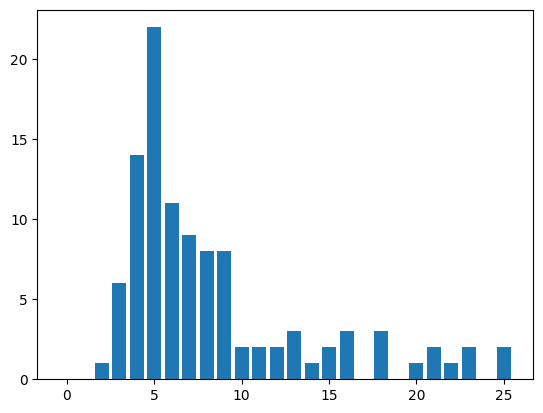

In [ ]:
plt.bar(range(len(nx.degree_histogram(G))),height=nx.degree_histogram(G))

In [ ]:
print('average_shortest_path_length', nx.average_shortest_path_length(G))
print('diameter', nx.diameter(G))
print('average_clustering', nx.average_clustering(G))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(G))


average_shortest_path_length 3.078754578754579
diameter 7
average_clustering 0.4875267912317314
degree_pearson_correlation_coefficient -0.1278960096667197


In [ ]:
nx.average_shortest_path_length(G), nx.diameter(G),nx.average_clustering(G),nx.degree_pearson_correlation_coefficient(G),

(3.078754578754579, 7, 0.4875267912317314, -0.1278960096667197)

In [ ]:
print('Degree Centrality', nx.degree_centrality(G))
print('pagerank', nx.pagerank(G))
print('Closeness Centrality', nx.closeness_centrality(G))
print('Betweenness Centrality', nx.betweenness_centrality(G))
print('Eigenvector Centrality', nx.eigenvector_centrality(G,max_iter=600))

Degree Centrality {'1000 Years for Revenge': 0.057692307692307696, 'Bush vs. the Beltway': 0.038461538461538464, "Charlie Wilson's War": 0.038461538461538464, 'Losing Bin Laden': 0.22115384615384617, 'Sleeping With the Devil': 0.07692307692307693, 'The Man Who Warned America': 0.06730769230769232, 'Why America Slept': 0.10576923076923078, 'Ghost Wars': 0.07692307692307693, 'A National Party No More': 0.2403846153846154, 'Bush Country': 0.15384615384615385, 'Dereliction of Duty': 0.14423076923076925, 'Legacy': 0.17307692307692307, 'Off with Their Heads': 0.2403846153846154, 'Persecution': 0.125, "Rumsfeld's War": 0.08653846153846154, 'Breakdown': 0.04807692307692308, 'Betrayal': 0.028846153846153848, 'Shut Up and Sing': 0.04807692307692308, 'Meant To Be': 0.028846153846153848, 'The Right Man': 0.04807692307692308, 'Ten Minutes from Normal': 0.09615384615384616, "Hillary's Scheme": 0.04807692307692308, 'The French Betrayal of America': 0.06730769230769232, 'Tales from the Left Coast': 0.

In [ ]:
nx.clustering(G)

{'1000 Years for Revenge': 0.6,
 'Bush vs. the Beltway': 0.8333333333333334,
 "Charlie Wilson's War": 0.6666666666666666,
 'Losing Bin Laden': 0.20948616600790515,
 'Sleeping With the Devil': 0.25,
 'The Man Who Warned America': 0.5238095238095238,
 'Why America Slept': 0.18181818181818182,
 'Ghost Wars': 0.17857142857142858,
 'A National Party No More': 0.25333333333333335,
 'Bush Country': 0.3,
 'Dereliction of Duty': 0.3047619047619048,
 'Legacy': 0.29411764705882354,
 'Off with Their Heads': 0.23333333333333334,
 'Persecution': 0.3333333333333333,
 "Rumsfeld's War": 0.4166666666666667,
 'Breakdown': 0.7,
 'Betrayal': 1.0,
 'Shut Up and Sing': 0.9,
 'Meant To Be': 0.6666666666666666,
 'The Right Man': 0.2,
 'Ten Minutes from Normal': 0.4,
 "Hillary's Scheme": 0.8,
 'The French Betrayal of America': 0.3333333333333333,
 'Tales from the Left Coast': 0.5,
 'Hating America': 0.6111111111111112,
 'The Third Terrorist': 0.4,
 'Endgame': 0.5277777777777778,
 'Spin Sisters': 0.5833333333333

In [ ]:
pb_dc=nx.degree_centrality(G)
pb_pg=nx.pagerank(G)
pb_cc=nx.closeness_centrality(G)
pb_bc=nx.betweenness_centrality(G)
pb_ec=nx.eigenvector_centrality(G,max_iter=600)

In [ ]:
booklist_t=(max(pb_dc, key=pb_dc.get),max(pb_ec, key=pb_ec.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get))

In [ ]:
print(booklist_t)

('A National Party No More', 'Bushwhacked', 'Off with Their Heads', 'The Price of Loyalty', 'The Price of Loyalty')


In [ ]:
sorted(pb_dc.items(), key=lambda item: item[1],reverse=True)[:10]

[('A National Party No More', 0.2403846153846154),
 ('Off with Their Heads', 0.2403846153846154),
 ('Losing Bin Laden', 0.22115384615384617),
 ('Bushwhacked', 0.22115384615384617),
 ('American Dynasty', 0.21153846153846156),
 ('The Great Unraveling', 0.20192307692307693),
 ('Big Lies', 0.20192307692307693),
 ('The Price of Loyalty', 0.19230769230769232),
 ('Legacy', 0.17307692307692307),
 ('Deliver Us from Evil', 0.17307692307692307)]

In [ ]:
sorted(pb_ec.items(), key=lambda item: item[1],reverse=True)[:10]

[('Bushwhacked', 0.2968942388914732),
 ('Big Lies', 0.2840854288947651),
 ('American Dynasty', 0.2707929917346434),
 ('The Price of Loyalty', 0.2585535030455825),
 ('The Great Unraveling', 0.2548422830429595),
 ('The Lies of George W. Bush', 0.24190744028089145),
 ('Worse Than Watergate', 0.23755824391953415),
 ('Plan of Attack', 0.19815671544674818),
 ('Lies and the Lying Liars Who Tell Them', 0.18920258358689793),
 ('Against All Enemies', 0.18669590012746018)]

In [ ]:
sorted(pb_pg.items(), key=lambda item: item[1],reverse=True)[:10]

[('Off with Their Heads', 0.025586835412470296),
 ('A National Party No More', 0.024989526526750017),
 ('Losing Bin Laden', 0.02423042104025228),
 ('Bushwhacked', 0.023179612771419066),
 ('American Dynasty', 0.02239307368693696),
 ('The Great Unraveling', 0.021867962362470832),
 ('Big Lies', 0.021253017512983412),
 ('The Price of Loyalty', 0.020231413694347593),
 ('Legacy', 0.01871191620853265),
 ('Arrogance', 0.018305237530519918)]

In [ ]:
sorted(pb_cc.items(), key=lambda item: item[1],reverse=True)[:10]

[('The Price of Loyalty', 0.41434262948207173),
 ('Rise of the Vulcans', 0.4126984126984127),
 ('Ghost Wars', 0.40784313725490196),
 ('The Bushes', 0.40784313725490196),
 ('Bush Country', 0.40625),
 ('Plan of Attack', 0.3969465648854962),
 ("Rumsfeld's War", 0.39543726235741444),
 ('American Dynasty', 0.3939393939393939),
 ('Sleeping With the Devil', 0.39097744360902253),
 ('House of Bush, House of Saud', 0.38235294117647056)]

In [ ]:
sorted(pb_bc.items(), key=lambda item: item[1],reverse=True)[:10]

[('The Price of Loyalty', 0.13947827864287202),
 ('The Bushes', 0.10364920953531946),
 ('Bush Country', 0.09839490722763909),
 ('Off with Their Heads', 0.09526168061799924),
 ('American Dynasty', 0.09093422527408519),
 ('Plan of Attack', 0.08030200829197105),
 ('Losing Bin Laden', 0.07609290805120641),
 ('Rise of the Vulcans', 0.0752717563623536),
 ('A National Party No More', 0.07490760424804607),
 ('Ghost Wars', 0.06872446488084949)]

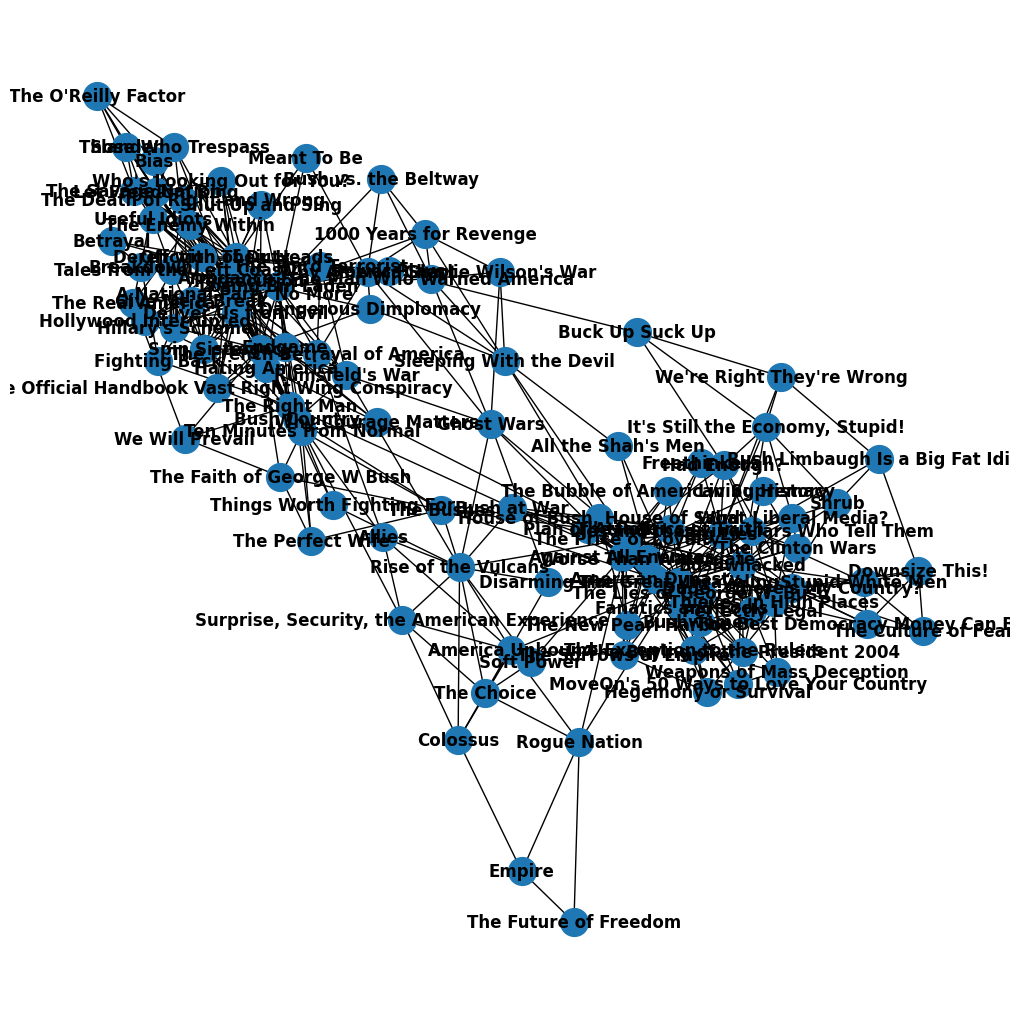

In [ ]:
pos = nx.spring_layout(G)
plt.figure(3,figsize=(10,10))
nx.draw(G, pos, node_size=400, with_labels=True, font_weight='bold')
plt.show()

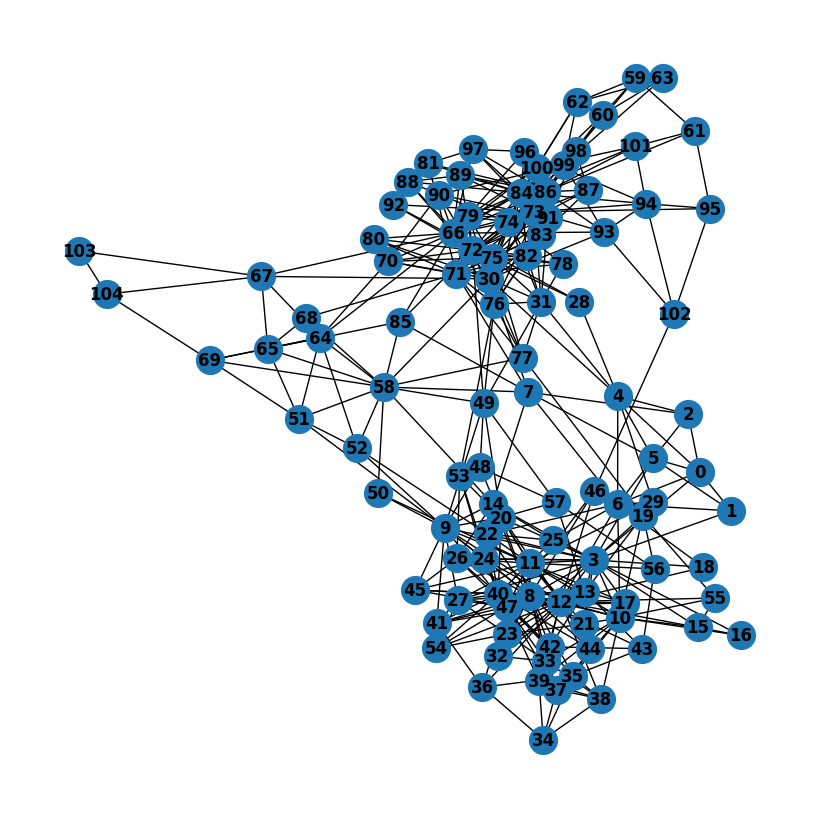

In [ ]:
pos1 = nx.spring_layout(G1)
plt.figure(3,figsize=(8,8))
nx.draw(G1, pos1, node_size=400, with_labels=True, font_weight='bold')
plt.show()

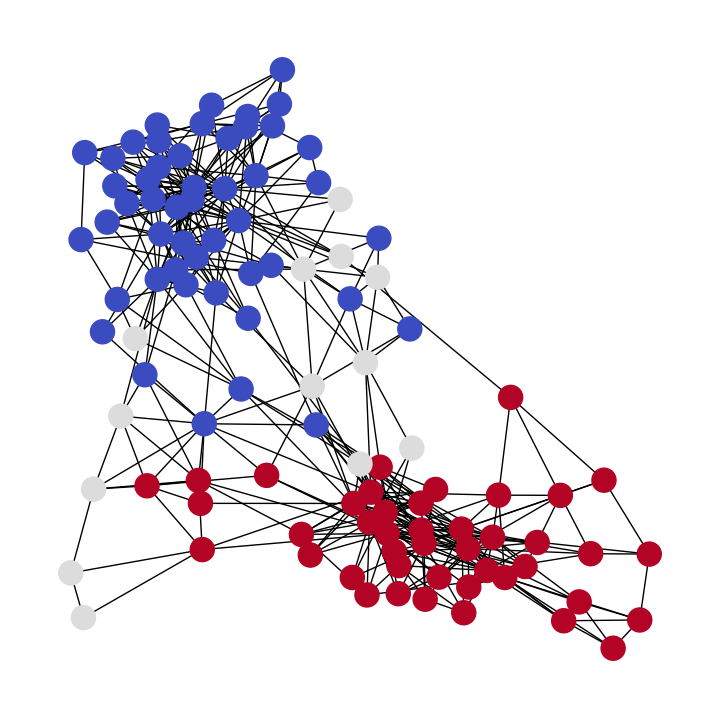

In [ ]:
community_map = {}
for node in G.nodes(data=True):
    if node[1]["value"] == "c":
      community_map[node[0]] = 0
    elif node[1]["value"] == "n":
      community_map[node[0]] = 1
    elif node[1]["value"] == "l":
      community_map[node[0]] = 2
node_color = []
color_map = {0: 0, 1: 1,2:2}
node_color = [color_map[community_map[node]] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color)
plt.show()

In [ ]:
node_trans={0:'c',1:'n',2:'l'}
node_type = {node:node_trans[community_map[node]] for node in G.nodes}
nx.set_node_attributes(G,node_type,'node_type')

In [ ]:
node_type = {node:community_map[node] for node in G.nodes}
nx.set_node_attributes(G,node_type,'node_label')

In [ ]:
edge_type={}
for edge in G.edges():
    if G.nodes[edge[0]]['value'] == 'c' and G.nodes[edge[1]]['value'] == 'c':
      edge_type[edge] = 'e0'
    elif G.nodes[edge[0]]['value'] == 'n' and G.nodes[edge[1]]['value'] == 'n':
      edge_type[edge] = 'e1'
    elif G.nodes[edge[0]]['value'] == 'l' and G.nodes[edge[1]]['value'] == 'l':
        edge_type[edge] = 'e2'
    elif G.nodes[edge[0]]['value'] == 'c' and G.nodes[edge[1]]['value'] == 'n':
        edge_type[edge] = 'e3'
    elif G.nodes[edge[0]]['value'] == 'c' and G.nodes[edge[1]]['value'] == 'l':
        edge_type[edge] = 'e4'

    elif G.nodes[edge[0]]['value'] == 'n' and G.nodes[edge[1]]['value'] == 'l':
        edge_type[edge] = 'e5'
    elif G.nodes[edge[0]]['value'] == 'n' and G.nodes[edge[1]]['value'] == 'c':
        edge_type[edge] = 'e3'
    elif G.nodes[edge[0]]['value'] == 'l' and G.nodes[edge[1]]['value'] == 'c':
        edge_type[edge] = 'e4'
    elif G.nodes[edge[0]]['value'] == 'l' and G.nodes[edge[1]]['value'] == 'n':
        edge_type[edge] = 'e5'
nx.set_edge_attributes(G,edge_type,'edge_type')

In [ ]:
edge_color = {}
for edge in G.edges():
    n1, n2 = edge
    if community_map[n1] == community_map[n2] == 0 :
      #edge_color[edge] = 0
      edge_color[edge] = 'blue'
    elif community_map[n1] == community_map[n2] == 1 :
      #edge_color[edge] = 1
      edge_color[edge] = 'grey'

    elif community_map[n1] == community_map[n2] == 2 :
      #edge_color[edge] = 2
      edge_color[edge] = 'red'
    elif community_map[n1] == 0 and community_map[n2] == 1 :
      #edge_color[edge] = 3
      edge_color[edge] = 'black'
    elif community_map[n1] == 1 and community_map[n2] == 0 :
      #edge_color[edge] = 3
      edge_color[edge] = 'black'
    elif community_map[n1] == 0 and community_map[n2] ==2  :
      #edge_color[edge] = 4
      edge_color[edge] = 'pink'
    elif community_map[n1] == 2 and community_map[n2] ==0  :
      #edge_color[edge] = 4
      edge_color[edge] = 'pink'

    elif community_map[n1] == 1 and community_map[n2] ==2  :
      edge_color[edge] = 'orange'
    elif community_map[n1] == 2 and community_map[n2] ==1  :
      edge_color[edge] = 'orange'
    #else :
      #edge_color[edge] = 5
      #edge_color[edge] = 'orange'



In [ ]:
edge_color

{('1000 Years for Revenge', 'Bush vs. the Beltway'): 'black',
 ('1000 Years for Revenge', "Charlie Wilson's War"): 'black',
 ('1000 Years for Revenge', 'Losing Bin Laden'): 'black',
 ('1000 Years for Revenge', 'Sleeping With the Devil'): 'grey',
 ('1000 Years for Revenge', 'The Man Who Warned America'): 'black',
 ('1000 Years for Revenge', 'Why America Slept'): 'grey',
 ('Bush vs. the Beltway', 'Losing Bin Laden'): 'blue',
 ('Bush vs. the Beltway', 'The Man Who Warned America'): 'blue',
 ('Bush vs. the Beltway', 'Why America Slept'): 'black',
 ("Charlie Wilson's War", 'Sleeping With the Devil'): 'black',
 ("Charlie Wilson's War", 'The Man Who Warned America'): 'blue',
 ("Charlie Wilson's War", 'Ghost Wars'): 'black',
 ('Losing Bin Laden', 'The Man Who Warned America'): 'blue',
 ('Losing Bin Laden', 'A National Party No More'): 'blue',
 ('Losing Bin Laden', 'Bush Country'): 'blue',
 ('Losing Bin Laden', 'Dereliction of Duty'): 'blue',
 ('Losing Bin Laden', 'Legacy'): 'blue',
 ('Losing B

In [ ]:
import copy

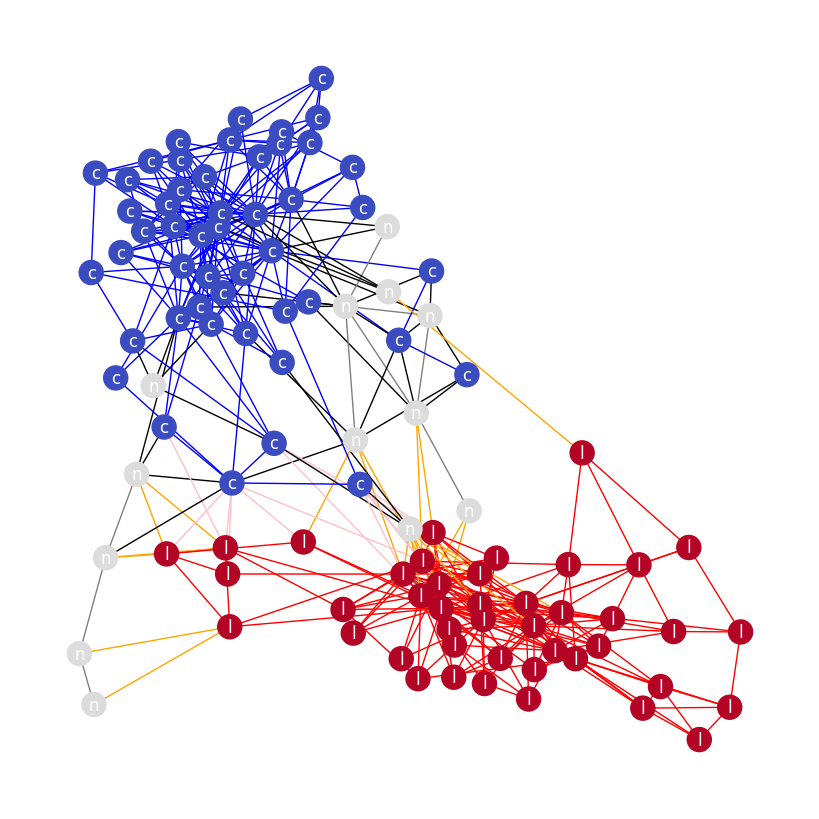

In [ ]:
G_orig = copy.deepcopy(G)
nx.classes.function.set_edge_attributes(G, edge_color, name='color')
colors = nx.get_edge_attributes(G,'color').values()
labels = nx.get_node_attributes(G, 'node_type')
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=colors, labels=labels, font_color='white')
plt.show()

##1-2

In [ ]:
[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'blue' ]

[('Bush vs. the Beltway',
  'Losing Bin Laden',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Bush vs. the Beltway',
  'The Man Who Warned America',
  {'edge_type': 'e0', 'color': 'blue'}),
 ("Charlie Wilson's War",
  'The Man Who Warned America',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden',
  'The Man Who Warned America',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden',
  'A National Party No More',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden', 'Bush Country', {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden',
  'Dereliction of Duty',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden', 'Legacy', {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden',
  'Off with Their Heads',
  {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden', 'Persecution', {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden', "Rumsfeld's War", {'edge_type': 'e0', 'color': 'blue'}),
 ('Losing Bin Laden', 'Breakdown', {'edge_typ

In [ ]:
c1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'blue' ]
n1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'grey' ]
l1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'red' ]
Gn=nx.Graph(n1)
Gc = nx.Graph(c1)
Gl=nx.Graph(l1)

<BarContainer object of 25 artists>

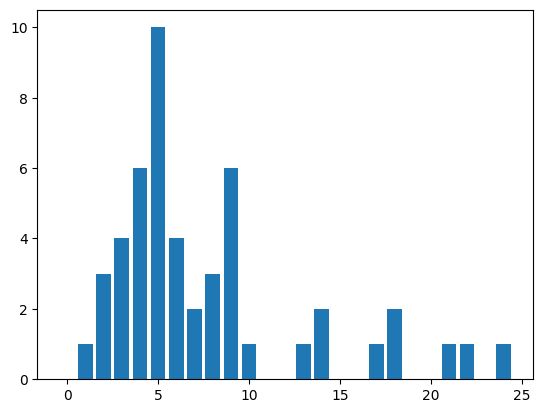

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gc))),height=nx.degree_histogram(Gc))

In [ ]:
print('average_shortest_path_length', nx.average_shortest_path_length(Gc))
print('diameter', nx.diameter(Gc))
print('average_clustering', nx.average_clustering(Gc))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gc))
print('Degree Centrality', nx.degree_centrality(Gc))
print('pagerank', nx.pagerank(Gc))
print('Closeness Centrality', nx.closeness_centrality(Gc))
print('Betweenness Centrality', nx.betweenness_centrality(Gc))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gc,max_iter=600))

average_shortest_path_length 2.192176870748299
diameter 5
average_clustering 0.47451270059052314
degree_pearson_correlation_coefficient -0.13074378307346535
Degree Centrality {'Bush vs. the Beltway': 0.041666666666666664, 'Losing Bin Laden': 0.4375, 'The Man Who Warned America': 0.0625, "Charlie Wilson's War": 0.020833333333333332, 'A National Party No More': 0.5, 'Bush Country': 0.29166666666666663, 'Dereliction of Duty': 0.29166666666666663, 'Legacy': 0.375, 'Off with Their Heads': 0.4583333333333333, 'Persecution': 0.2708333333333333, "Rumsfeld's War": 0.16666666666666666, 'Breakdown': 0.10416666666666666, 'Betrayal': 0.0625, 'Shut Up and Sing': 0.10416666666666666, 'The Right Man': 0.10416666666666666, 'Ten Minutes from Normal': 0.1875, "Hillary's Scheme": 0.10416666666666666, 'The French Betrayal of America': 0.125, 'Tales from the Left Coast': 0.1875, 'Hating America': 0.1875, 'The Third Terrorist': 0.08333333333333333, 'Endgame': 0.1875, 'Spin Sisters': 0.1875, 'The Death of Rig

In [ ]:
pb_dc=nx.degree_centrality(Gc)
pb_pg=nx.pagerank(Gc)
pb_cc=nx.closeness_centrality(Gc)
pb_bc=nx.betweenness_centrality(Gc)
pb_ec=nx.eigenvector_centrality(Gc,max_iter=600)

In [ ]:
booklist_c=(max(pb_dc, key=pb_dc.get),max(pb_ec, key=pb_ec.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get))
print(booklist_c)

('A National Party No More', 'A National Party No More', 'A National Party No More', 'A National Party No More', 'Losing Bin Laden')


In [ ]:
colors = nx.get_edge_attributes(Gc,'color').values()

In [ ]:
labels = nx.get_node_attributes(Gc, 'node_type')

In [ ]:
Gc.nodes()

NodeView(('Bush vs. the Beltway', 'Losing Bin Laden', 'The Man Who Warned America', "Charlie Wilson's War", 'A National Party No More', 'Bush Country', 'Dereliction of Duty', 'Legacy', 'Off with Their Heads', 'Persecution', "Rumsfeld's War", 'Breakdown', 'Betrayal', 'Shut Up and Sing', 'The Right Man', 'Ten Minutes from Normal', "Hillary's Scheme", 'The French Betrayal of America', 'Tales from the Left Coast', 'Hating America', 'The Third Terrorist', 'Endgame', 'Spin Sisters', 'The Death of Right and Wrong', 'Useful Idiots', 'Let Freedom Ring', 'Bias', 'Deliver Us from Evil', 'Give Me a Break', 'The Enemy Within', 'The Real America', "Who's Looking Out for You?", 'The Official Handbook Vast Right Wing Conspiracy', 'Arrogance', 'The Bushes', 'Things Worth Fighting For', 'Allies', 'Slander', 'The Savage Nation', 'Fighting Back', 'Dangerous Dimplomacy', 'We Will Prevail', 'Those Who Trespass', 'Hollywood Interrupted', 'The Faith of George W Bush', 'Rise of the Vulcans', 'Bush at War', 'Wh

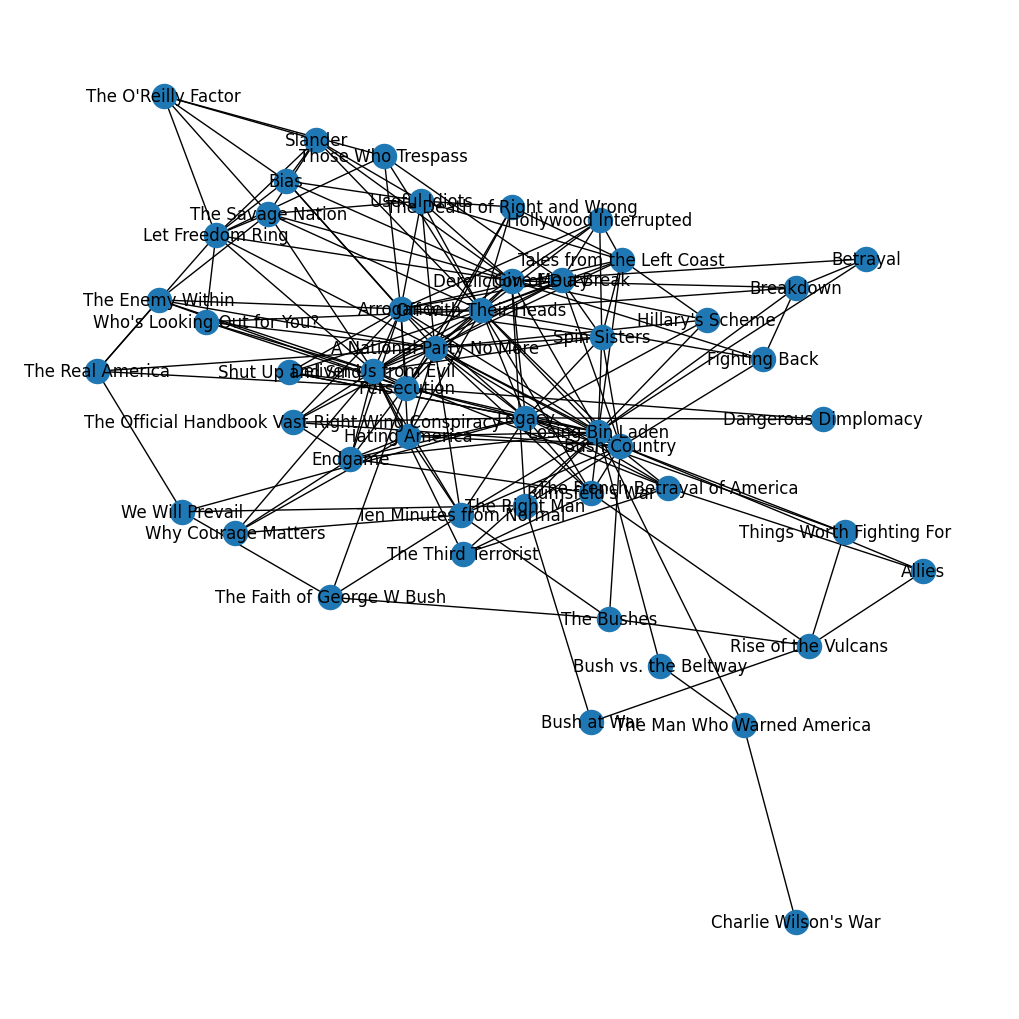

In [ ]:
plt.figure(figsize=(10, 10))
#nx.draw(Gc, with_labels=True)
nx.draw(Gc,with_labels=True )

<BarContainer object of 5 artists>

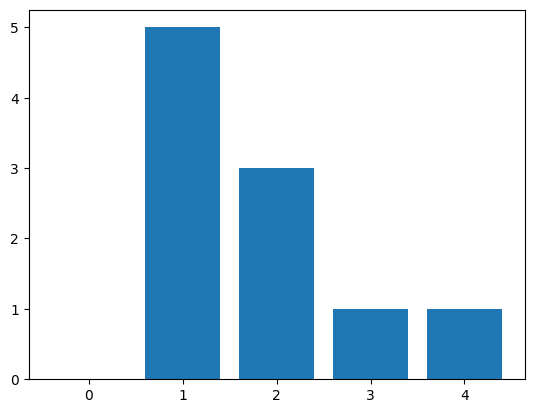

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gn))),height=nx.degree_histogram(Gn))

In [ ]:
import itertools

In [ ]:
n2=list(itertools.chain.from_iterable([list(Gn.edges(cc[0]))  for  cc in Gn.nodes(data=True) if Gn.degree(cc[0]) >2]))

In [ ]:
n3=list(itertools.chain.from_iterable(n2))

In [ ]:
Gn1=nx.Graph(n2)

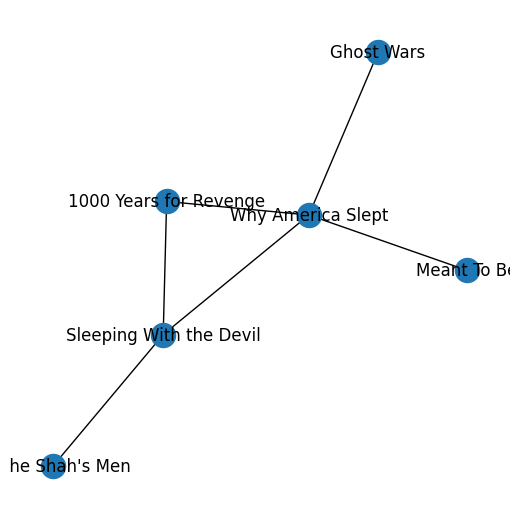

In [ ]:
plt.figure(figsize=(5, 5))
#nx.draw(Gc, with_labels=True)
nx.draw(Gn1,with_labels=True )

In [ ]:
n3=list(itertools.chain.from_iterable([list(Gn.edges(cc[0]))  for  cc in Gn.nodes(data=True) if Gn.degree(cc[0]) <=2]))

In [ ]:



print('average_clustering', nx.average_clustering(Gn))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gn))
print('Degree Centrality', nx.degree_centrality(Gn))
print('pagerank', nx.pagerank(Gn))
print('Closeness Centrality', nx.closeness_centrality(Gn))
print('Betweenness Centrality', nx.betweenness_centrality(Gn))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gn,max_iter=600))

average_clustering 0.15
degree_pearson_correlation_coefficient -0.3636363636363636
Degree Centrality {'1000 Years for Revenge': 0.2222222222222222, 'Sleeping With the Devil': 0.3333333333333333, 'Why America Slept': 0.4444444444444444, "All the Shah's Men": 0.1111111111111111, 'Ghost Wars': 0.1111111111111111, 'Meant To Be': 0.1111111111111111, 'Surprise, Security, the American Experience': 0.1111111111111111, 'Colossus': 0.2222222222222222, 'Empire': 0.2222222222222222, 'The Future of Freedom': 0.1111111111111111}
pagerank {'1000 Years for Revenge': 0.09662472525926231, 'Sleeping With the Devil': 0.14430755883103374, 'Why America Slept': 0.19170499404783906, "All the Shah's Men": 0.05588672865665967, 'Ghost Wars': 0.05573799660260266, 'Meant To Be': 0.05573799660260266, 'Surprise, Security, the American Experience': 0.0701754385967032, 'Colossus': 0.12982456140329685, 'Empire': 0.12982456140329685, 'The Future of Freedom': 0.0701754385967032}
Closeness Centrality {'1000 Years for Reve

In [ ]:
pb_dc=nx.degree_centrality(Gn)
pb_pg=nx.pagerank(Gn)
pb_cc=nx.closeness_centrality(Gn)
pb_bc=nx.betweenness_centrality(Gn)
pb_ec=nx.eigenvector_centrality(Gn,max_iter=600)

In [ ]:
booklist_n=(max(pb_dc, key=pb_dc.get),max(pb_ec, key=pb_ec.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get))
print(booklist_n)

('Why America Slept', 'Why America Slept', 'Why America Slept', 'Why America Slept', 'Why America Slept')


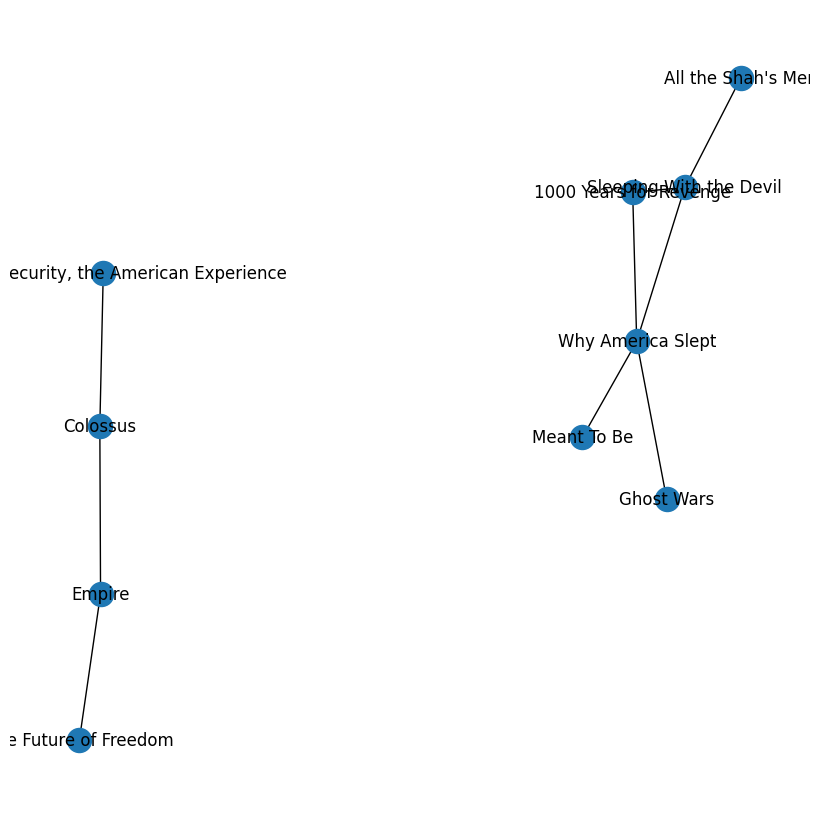

In [ ]:
plt.figure(figsize=(8, 8))

nx.draw(Gn,with_labels=True )

<BarContainer object of 23 artists>

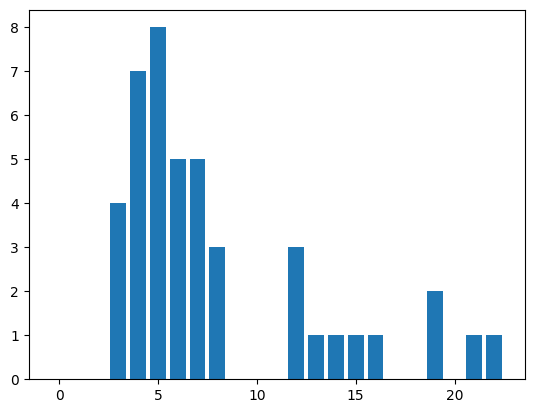

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gl))),height=nx.degree_histogram(Gl))

In [ ]:
print('average_shortest_path_length', nx.average_shortest_path_length(Gl))
print('diameter', nx.diameter(Gl))
print('average_clustering', nx.average_clustering(Gl))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gl))
print('Degree Centrality', nx.degree_centrality(Gl))
print('pagerank', nx.pagerank(Gl))
print('Closeness Centrality', nx.closeness_centrality(Gl))
print('Betweenness Centrality', nx.betweenness_centrality(Gl))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gl,max_iter=600))

average_shortest_path_length 2.0985603543743077
diameter 4
average_clustering 0.5161914686700488
degree_pearson_correlation_coefficient -0.10186940320000712
Degree Centrality {'The Price of Loyalty': 0.3571428571428571, 'House of Bush, House of Saud': 0.16666666666666666, 'The Great Unraveling': 0.45238095238095233, 'Rogue Nation': 0.09523809523809523, 'The Sorrows of Empire': 0.16666666666666666, 'Big Lies': 0.5, 'The Lies of George W. Bush': 0.38095238095238093, 'Worse Than Watergate': 0.3333333333333333, 'Bushwomen': 0.19047619047619047, 'The Bubble of American Supremacy': 0.09523809523809523, 'The Politics of Truth': 0.19047619047619047, 'Fanatics and Fools': 0.16666666666666666, 'Bushwhacked': 0.5238095238095237, 'Lies and the Lying Liars Who Tell Them': 0.30952380952380953, 'Had Enough?': 0.16666666666666666, "Dude, Where's My Country?": 0.2857142857142857, 'The New Pearl Harbor': 0.11904761904761904, 'The Exception to the Rulers': 0.19047619047619047, 'Downsize This!': 0.1190476

In [ ]:
pb_dc=nx.degree_centrality(Gl)
pb_pg=nx.pagerank(Gl)
pb_cc=nx.closeness_centrality(Gl)
pb_bc=nx.betweenness_centrality(Gl)
pb_ec=nx.eigenvector_centrality(Gl,max_iter=600)

In [ ]:
booklist_l=(max(pb_dc, key=pb_dc.get),max(pb_ec, key=pb_ec.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get))
print(booklist_l)

('Bushwhacked', 'Bushwhacked', 'Bushwhacked', 'Big Lies', 'The Great Unraveling')


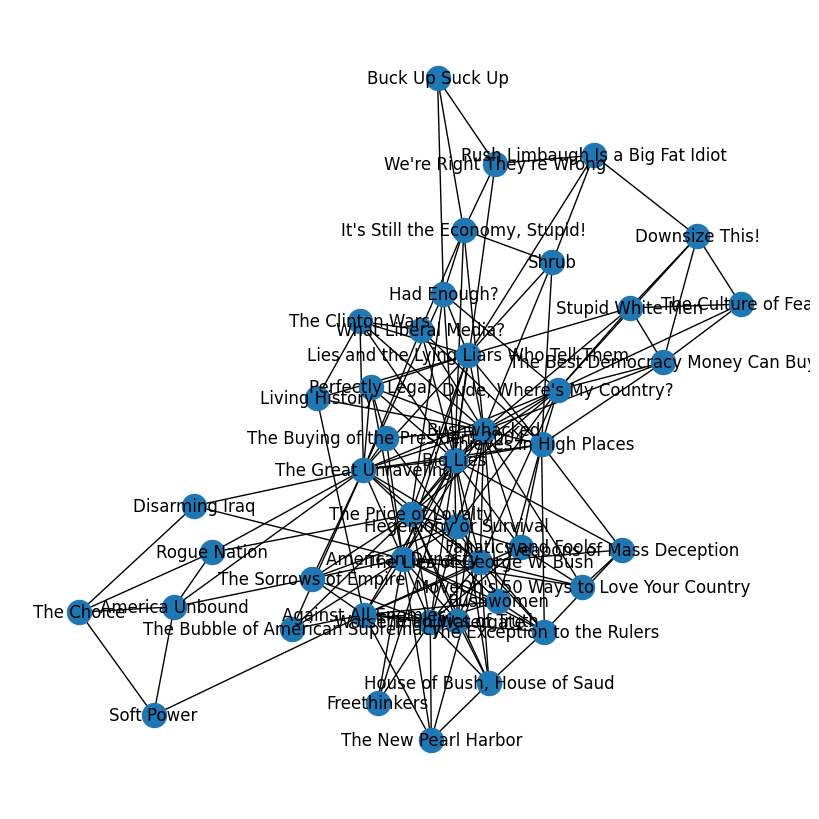

In [ ]:
plt.figure(figsize=(8, 8))

nx.draw(Gl,with_labels=True )

In [ ]:
pb_dc=nx.degree_centrality(Gl)
pb_pg=nx.pagerank(Gl)
pb_cc=nx.closeness_centrality(Gl)
pb_bc=nx.betweenness_centrality(Gl)
pb_ec=nx.eigenvector_centrality(Gl,max_iter=600)

print('average_shortest_path_length', nx.average_shortest_path_length(Gl))
print('diameter', nx.diameter(Gl))
print('average_clustering', nx.average_clustering(Gl))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gl))
print('Degree Centrality', nx.degree_centrality(Gl))
print('pagerank', nx.pagerank(Gl))
print('Closeness Centrality', nx.closeness_centrality(Gl))
print('Betweenness Centrality', nx.betweenness_centrality(Gl))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gl,max_iter=600))





average_shortest_path_length 2.0985603543743077
diameter 4
average_clustering 0.5161914686700488
degree_pearson_correlation_coefficient -0.10186940320000712
Degree Centrality {'The Price of Loyalty': 0.3571428571428571, 'House of Bush, House of Saud': 0.16666666666666666, 'The Great Unraveling': 0.45238095238095233, 'Rogue Nation': 0.09523809523809523, 'The Sorrows of Empire': 0.16666666666666666, 'Big Lies': 0.5, 'The Lies of George W. Bush': 0.38095238095238093, 'Worse Than Watergate': 0.3333333333333333, 'Bushwomen': 0.19047619047619047, 'The Bubble of American Supremacy': 0.09523809523809523, 'The Politics of Truth': 0.19047619047619047, 'Fanatics and Fools': 0.16666666666666666, 'Bushwhacked': 0.5238095238095237, 'Lies and the Lying Liars Who Tell Them': 0.30952380952380953, 'Had Enough?': 0.16666666666666666, "Dude, Where's My Country?": 0.2857142857142857, 'The New Pearl Harbor': 0.11904761904761904, 'The Exception to the Rulers': 0.19047619047619047, 'Downsize This!': 0.1190476

In [ ]:
print('max Degree Centrality:',max(pb_dc, key=pb_dc.get))
print('max pagerank:',max(pb_pg, key=pb_pg.get))
print('max Closeness Centrality:',max(pb_cc, key=pb_cc.get))
print('max Betweenness Centrality:',max(pb_bc, key=pb_bc.get))
print('max Eigenvector Centrality:',max(pb_ec, key=pb_ec.get))

max Degree Centrality: Bushwhacked
max pagerank: Bushwhacked
max Closeness Centrality: Big Lies
max Betweenness Centrality: The Great Unraveling
max Eigenvector Centrality: Bushwhacked


##1-3

In [ ]:
cle1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'pink' ]
nle1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'orange' ]
cne1=[cc for  cc in G.edges(data=True) if cc[2]['color'] == 'black' ]


cln1=[cc for  cc in G.nodes(data=True) if cc[1]['value'] =='c' or cc[1]['value'] =='l']
nln1=[cc for  cc in G.nodes(data=True) if cc[1]['value'] =='n' or cc[1]['value'] =='l']
cnn1=[cc for  cc in G.nodes(data=True) if cc[1]['value'] =='c' or cc[1]['value'] =='n']



In [ ]:

Gcl=nx.Graph(cle1)
Gnl=nx.Graph(nle1)
Gcn=nx.Graph(cne1)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


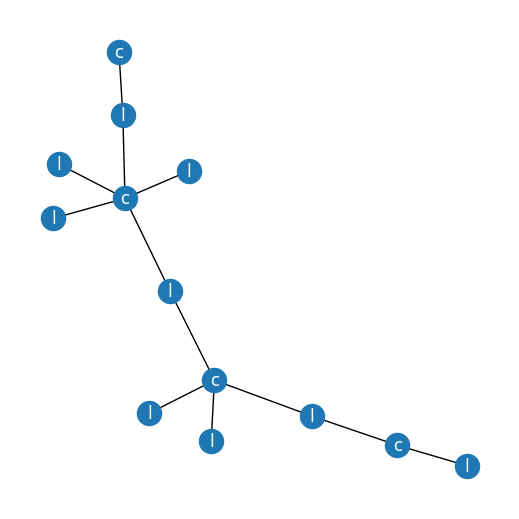

In [ ]:
node_type = {node:node_trans[community_map[node]] for node in Gcl.nodes}
nx.set_node_attributes(Gcl,node_type,'node_type')
#nx.classes.function.set_edge_attributes(Gcl, edge_color, name='color')
colors = nx.get_edge_attributes(Gcl,'color').values()
labels = nx.get_node_attributes(Gcl, 'node_type')
plt.figure(figsize=(5, 5))
nx.draw(Gcl, pos=nx.spring_layout(Gcl), cmap=plt.get_cmap('coolwarm'),  labels=labels, font_color='white')
plt.show()

<BarContainer object of 6 artists>

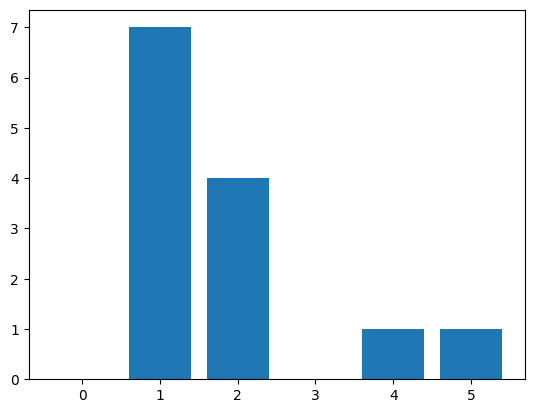

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gcl))),height=nx.degree_histogram(Gcl))

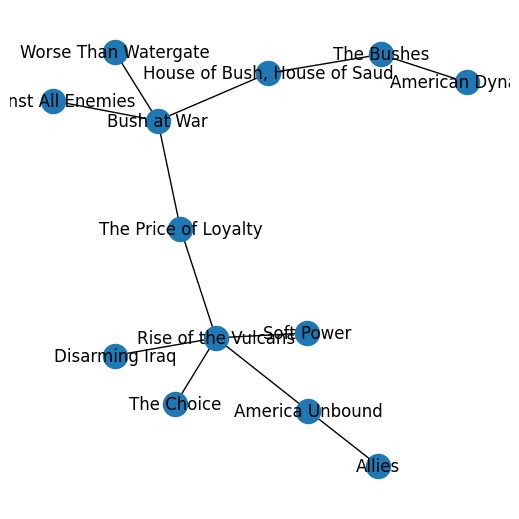

In [ ]:
plt.figure(figsize=(5, 5))
nx.draw(Gcl,with_labels=True )

In [ ]:
pb_dc=nx.degree_centrality(Gcl)
pb_pg=nx.pagerank(Gcl)
pb_cc=nx.closeness_centrality(Gcl)
pb_bc=nx.betweenness_centrality(Gcl)
pb_ec=nx.eigenvector_centrality(Gcl,max_iter=600)

#print('average_shortest_path_length', nx.average_shortest_path_length(Gcl))
#print('diameter', nx.diameter(Gcl))
print('average_clustering', nx.average_clustering(Gcl))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gcl))
print('Degree Centrality', nx.degree_centrality(Gcl))
print('pagerank', nx.pagerank(Gcl))
print('Closeness Centrality', nx.closeness_centrality(Gcl))
print('Betweenness Centrality', nx.betweenness_centrality(Gcl))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gcl,max_iter=600))

average_clustering 0.0
degree_pearson_correlation_coefficient -0.6395348837209303
Degree Centrality {'The Price of Loyalty': 0.16666666666666666, 'Rise of the Vulcans': 0.41666666666666663, 'Bush at War': 0.3333333333333333, 'House of Bush, House of Saud': 0.16666666666666666, 'The Bushes': 0.16666666666666666, 'American Dynasty': 0.08333333333333333, 'Allies': 0.08333333333333333, 'America Unbound': 0.16666666666666666, 'The Choice': 0.08333333333333333, 'Soft Power': 0.08333333333333333, 'Disarming Iraq': 0.08333333333333333, 'Against All Enemies': 0.08333333333333333, 'Worse Than Watergate': 0.08333333333333333}
pagerank {'The Price of Loyalty': 0.07742608034458603, 'Rise of the Vulcans': 0.19424803146357122, 'Bush at War': 0.15465688908737013, 'House of Bush, House of Saud': 0.08171329844544896, 'The Bushes': 0.08778678442896926, 'American Dynasty': 0.048848277229193, 'Allies': 0.047712975538696106, 'America Unbound': 0.08511752056774023, 'The Choice': 0.04456105912833008, 'Soft Po

In [ ]:
booklist_cl=(max(pb_dc, key=pb_dc.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get),max(pb_ec, key=pb_ec.get))
print(booklist_cl)

('Rise of the Vulcans', 'Rise of the Vulcans', 'The Price of Loyalty', 'Rise of the Vulcans', 'Rise of the Vulcans')


In [ ]:
print('max Degree Centrality:',max(pb_dc, key=pb_dc.get))
print('max pagerank:',max(pb_pg, key=pb_pg.get))
print('max Closeness Centrality:',max(pb_cc, key=pb_cc.get))
print('max Betweenness Centrality:',max(pb_bc, key=pb_bc.get))
print('max Eigenvector Centrality:',max(pb_ec, key=pb_ec.get))

max Degree Centrality: Rise of the Vulcans
max pagerank: Rise of the Vulcans
max Closeness Centrality: The Price of Loyalty
max Betweenness Centrality: Rise of the Vulcans
max Eigenvector Centrality: Rise of the Vulcans


<BarContainer object of 11 artists>

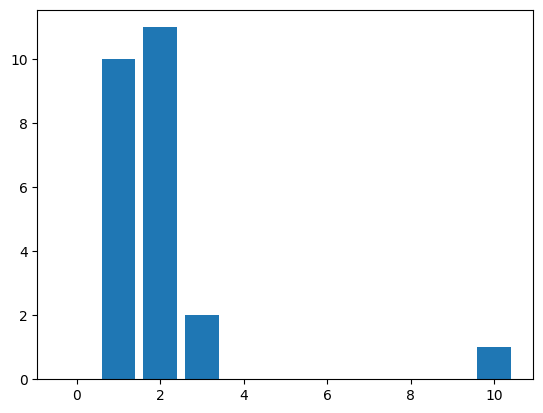

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gnl))),height=nx.degree_histogram(Gnl))

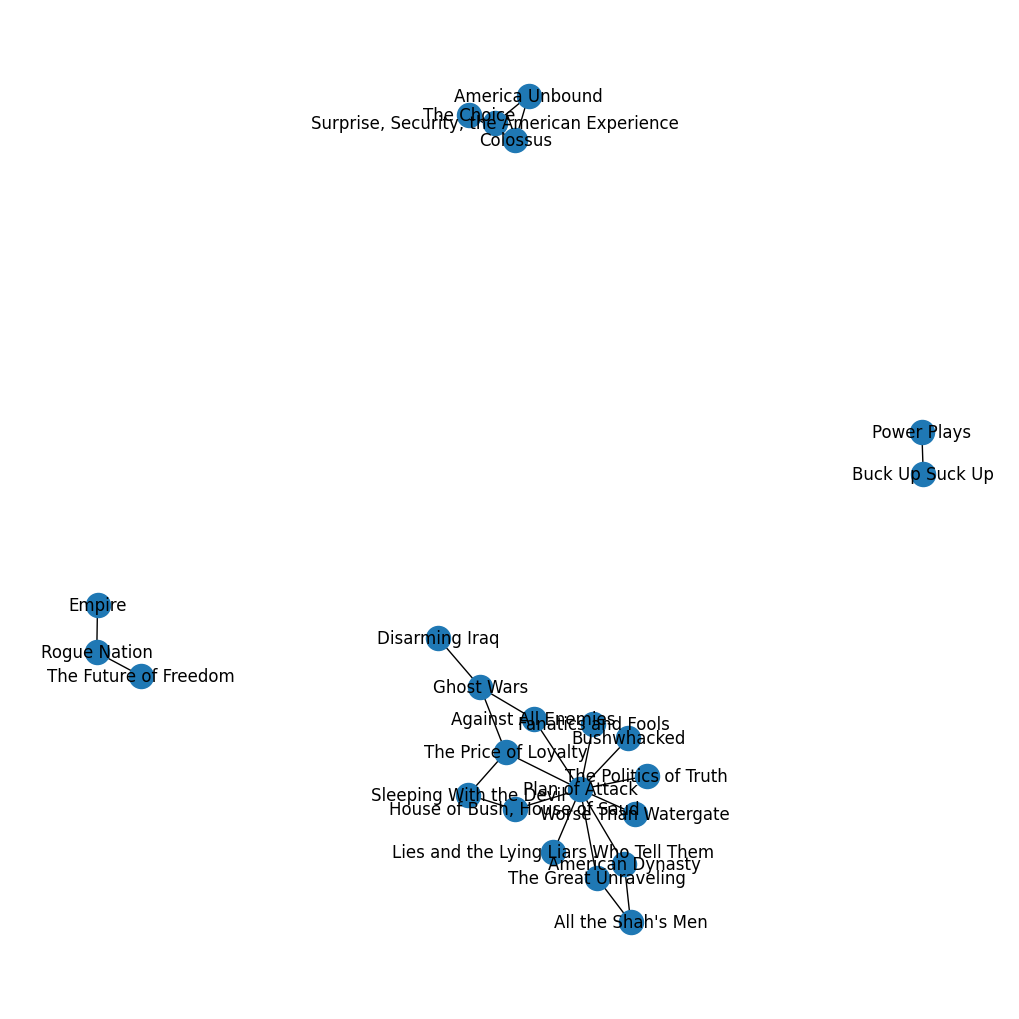

In [ ]:
plt.figure(figsize=(10, 10))
nx.draw(Gnl,with_labels=True )

In [ ]:
Gnl.edges(data=True)

EdgeDataView([('Sleeping With the Devil', 'The Price of Loyalty', {'edge_type': 'e5', 'color': 'orange'}), ('Sleeping With the Devil', 'House of Bush, House of Saud', {'edge_type': 'e5', 'color': 'orange'}), ('The Price of Loyalty', 'Ghost Wars', {'edge_type': 'e5', 'color': 'orange'}), ('The Price of Loyalty', 'Plan of Attack', {'edge_type': 'e5', 'color': 'orange'}), ('House of Bush, House of Saud', 'Plan of Attack', {'edge_type': 'e5', 'color': 'orange'}), ('Ghost Wars', 'Against All Enemies', {'edge_type': 'e5', 'color': 'orange'}), ('Ghost Wars', 'Disarming Iraq', {'edge_type': 'e5', 'color': 'orange'}), ('Against All Enemies', 'Plan of Attack', {'edge_type': 'e5', 'color': 'orange'}), ("All the Shah's Men", 'The Great Unraveling', {'edge_type': 'e5', 'color': 'orange'}), ("All the Shah's Men", 'American Dynasty', {'edge_type': 'e5', 'color': 'orange'}), ('The Great Unraveling', 'Plan of Attack', {'edge_type': 'e5', 'color': 'orange'}), ('American Dynasty', 'Plan of Attack', {'edg

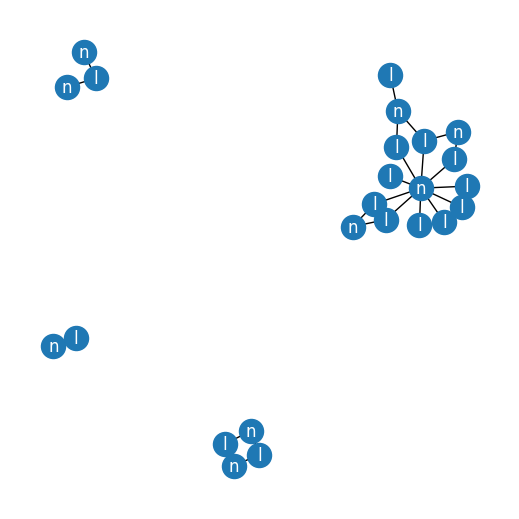

In [ ]:
node_type = {node:node_trans[community_map[node]] for node in Gnl.nodes}
nx.set_node_attributes(Gnl,node_type,'node_type')
#nx.classes.function.set_edge_attributes(Gcl, edge_color, name='color')
colors = nx.get_edge_attributes(Gnl,'color').values()
labels = nx.get_node_attributes(Gnl, 'node_type')
plt.figure(figsize=(5, 5))
nx.draw(Gnl, pos=nx.spring_layout(Gnl), cmap=plt.get_cmap('coolwarm'),  labels=labels, font_color='white')
plt.show()

In [ ]:
pb_dc=nx.degree_centrality(Gnl)
pb_pg=nx.pagerank(Gnl)
pb_cc=nx.closeness_centrality(Gnl)
pb_bc=nx.betweenness_centrality(Gnl)
pb_ec=nx.eigenvector_centrality(Gnl,max_iter=600)

#print('average_shortest_path_length', nx.average_shortest_path_length(Gnl))
#print('diameter', nx.diameter(Gnl))
print('average_clustering', nx.average_clustering(Gnl))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gnl))
print('Degree Centrality', nx.degree_centrality(Gnl))
print('pagerank', nx.pagerank(Gnl))
print('Closeness Centrality', nx.closeness_centrality(Gnl))
print('Betweenness Centrality', nx.betweenness_centrality(Gnl))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gnl,max_iter=600))

average_clustering 0.0
degree_pearson_correlation_coefficient -0.34038581207218416
Degree Centrality {'Sleeping With the Devil': 0.08695652173913043, 'The Price of Loyalty': 0.13043478260869565, 'House of Bush, House of Saud': 0.08695652173913043, 'Ghost Wars': 0.13043478260869565, 'Against All Enemies': 0.08695652173913043, 'Disarming Iraq': 0.043478260869565216, "All the Shah's Men": 0.08695652173913043, 'The Great Unraveling': 0.08695652173913043, 'American Dynasty': 0.08695652173913043, 'Plan of Attack': 0.43478260869565216, 'Power Plays': 0.043478260869565216, 'Buck Up Suck Up': 0.043478260869565216, 'Surprise, Security, the American Experience': 0.08695652173913043, 'America Unbound': 0.08695652173913043, 'The Choice': 0.08695652173913043, 'Colossus': 0.08695652173913043, 'Rogue Nation': 0.08695652173913043, 'The Future of Freedom': 0.043478260869565216, 'Empire': 0.043478260869565216, 'Worse Than Watergate': 0.043478260869565216, 'The Politics of Truth': 0.043478260869565216, 'F

In [ ]:
print('max Degree Centrality:',max(pb_dc, key=pb_dc.get))
print('max pagerank:',max(pb_pg, key=pb_pg.get))
print('max Closeness Centrality:',max(pb_cc, key=pb_cc.get))
print('max Betweenness Centrality:',max(pb_bc, key=pb_bc.get))
print('max Eigenvector Centrality:',max(pb_ec, key=pb_ec.get))

max Degree Centrality: Plan of Attack
max pagerank: Plan of Attack
max Closeness Centrality: Plan of Attack
max Betweenness Centrality: Plan of Attack
max Eigenvector Centrality: Plan of Attack


In [ ]:
booklist_nl=(max(pb_dc, key=pb_dc.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get),max(pb_ec, key=pb_ec.get))
print(booklist_nl)

('Plan of Attack', 'Plan of Attack', 'Plan of Attack', 'Plan of Attack', 'Plan of Attack')


<BarContainer object of 8 artists>

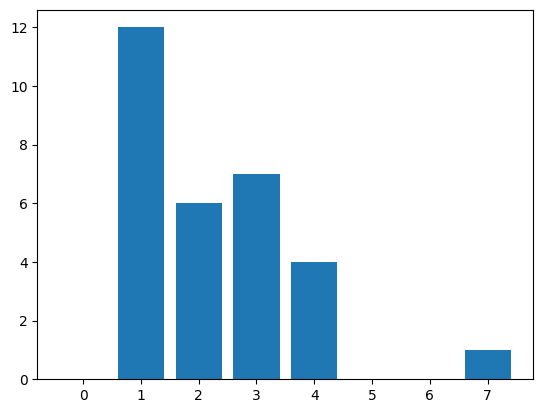

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gcn))),height=nx.degree_histogram(Gcn))

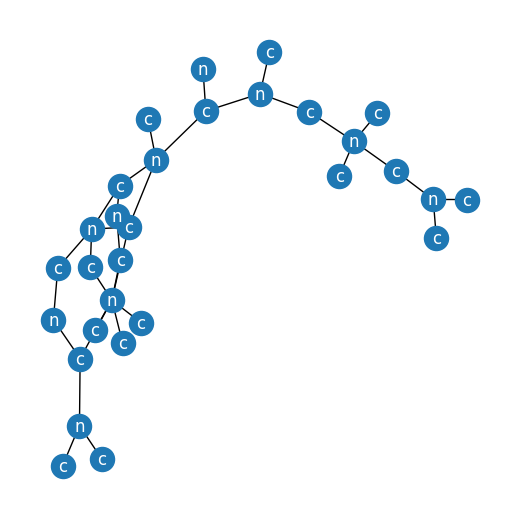

In [ ]:
node_type = {node:node_trans[community_map[node]] for node in Gcn.nodes}
nx.set_node_attributes(Gcn,node_type,'node_type')
#nx.classes.function.set_edge_attributes(Gcl, edge_color, name='color')
colors = nx.get_edge_attributes(Gcn,'color').values()
labels = nx.get_node_attributes(Gcn, 'node_type')
plt.figure(figsize=(5, 5))
nx.draw(Gcn, pos=nx.spring_layout(Gcn), cmap=plt.get_cmap('coolwarm'),  labels=labels, font_color='white')
plt.show()

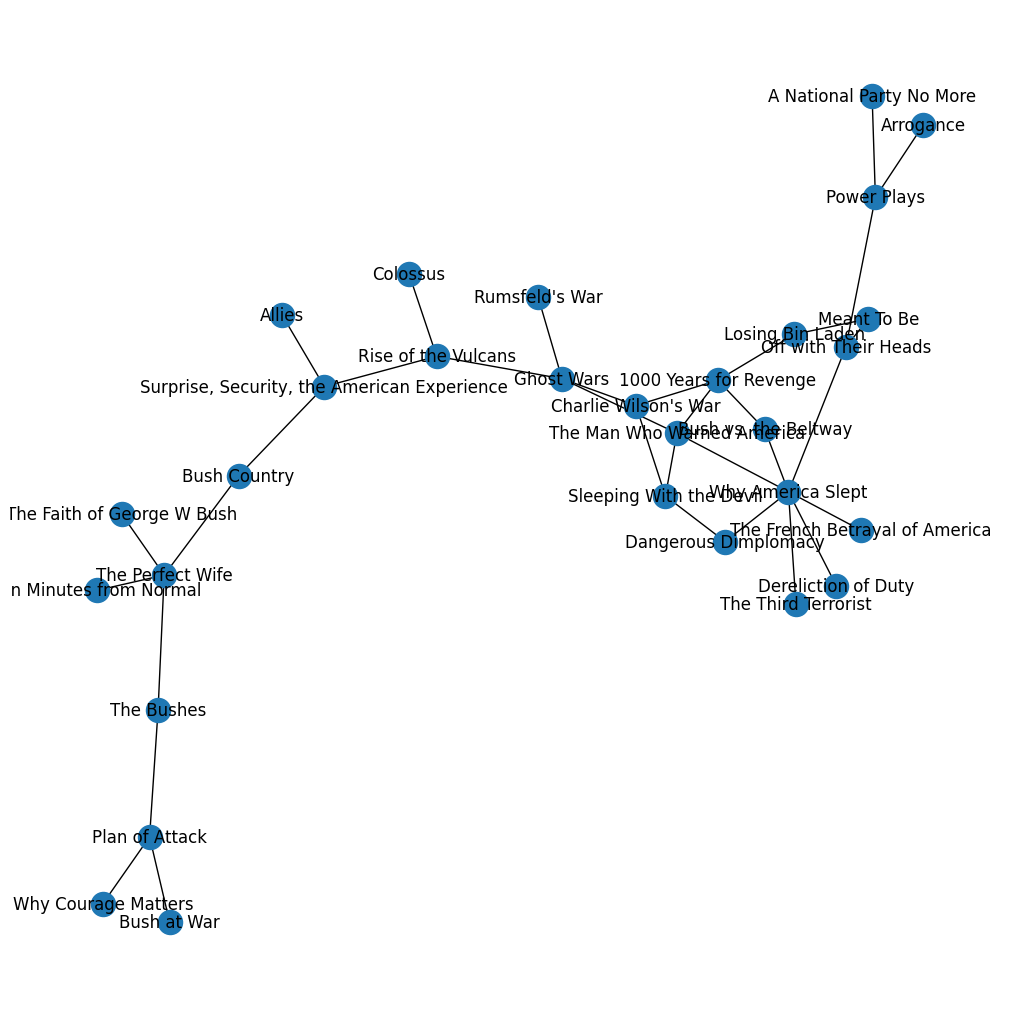

In [ ]:
plt.figure(figsize=(10, 10))
nx.draw(Gcn,with_labels=True )

In [ ]:
pb_dc=nx.degree_centrality(Gcn)
pb_pg=nx.pagerank(Gcn)
pb_cc=nx.closeness_centrality(Gcn)
pb_bc=nx.betweenness_centrality(Gcn)
pb_ec=nx.eigenvector_centrality(Gcn,max_iter=600)

#print('average_shortest_path_length', nx.average_shortest_path_length(Gnl))
#print('diameter', nx.diameter(Gnl))
print('average_clustering', nx.average_clustering(Gcn))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gcn))
print('Degree Centrality', nx.degree_centrality(Gcn))
print('pagerank', nx.pagerank(Gcn))
print('Closeness Centrality', nx.closeness_centrality(Gcn))
print('Betweenness Centrality', nx.betweenness_centrality(Gcn))
print('Eigenvector Centrality', nx.eigenvector_centrality(Gcn,max_iter=600))

average_clustering 0.0
degree_pearson_correlation_coefficient -0.37924528301886795
Degree Centrality {'1000 Years for Revenge': 0.13793103448275862, 'Bush vs. the Beltway': 0.06896551724137931, "Charlie Wilson's War": 0.10344827586206896, 'Losing Bin Laden': 0.06896551724137931, 'The Man Who Warned America': 0.13793103448275862, 'Why America Slept': 0.24137931034482757, 'Sleeping With the Devil': 0.10344827586206896, 'Ghost Wars': 0.13793103448275862, 'Meant To Be': 0.06896551724137931, 'Dangerous Dimplomacy': 0.06896551724137931, 'Dereliction of Duty': 0.034482758620689655, 'Off with Their Heads': 0.10344827586206896, 'The French Betrayal of America': 0.034482758620689655, 'The Third Terrorist': 0.034482758620689655, "Rumsfeld's War": 0.034482758620689655, 'Rise of the Vulcans': 0.10344827586206896, 'A National Party No More': 0.034482758620689655, 'Power Plays': 0.10344827586206896, 'Bush Country': 0.06896551724137931, 'The Perfect Wife': 0.13793103448275862, 'Surprise, Security, the

In [ ]:
print('max Degree Centrality:',max(pb_dc, key=pb_dc.get))
print('max pagerank:',max(pb_pg, key=pb_pg.get))
print('max Closeness Centrality:',max(pb_cc, key=pb_cc.get))
print('max Betweenness Centrality:',max(pb_bc, key=pb_bc.get))
print('max Eigenvector Centrality:',max(pb_ec, key=pb_ec.get))

max Degree Centrality: Why America Slept
max pagerank: Why America Slept
max Closeness Centrality: The Man Who Warned America
max Betweenness Centrality: Ghost Wars
max Eigenvector Centrality: Why America Slept


In [ ]:
booklist_cn=(max(pb_dc, key=pb_dc.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get),max(pb_ec, key=pb_ec.get))
print(booklist_cn)

('Why America Slept', 'Why America Slept', 'The Man Who Warned America', 'Ghost Wars', 'Why America Slept')


##1-4

In [ ]:
print(booklist_t)
print(booklist_l)
print(booklist_n)
print(booklist_c)
print(booklist_cn)
print(booklist_nl)
print(booklist_cl)

('A National Party No More', 'Bushwhacked', 'Off with Their Heads', 'The Price of Loyalty', 'The Price of Loyalty')
('Bushwhacked', 'Bushwhacked', 'Bushwhacked', 'Big Lies', 'The Great Unraveling')
('Why America Slept', 'Why America Slept', 'Why America Slept', 'Why America Slept', 'Why America Slept')
('A National Party No More', 'A National Party No More', 'A National Party No More', 'A National Party No More', 'Losing Bin Laden')
('Why America Slept', 'Why America Slept', 'The Man Who Warned America', 'Ghost Wars', 'Why America Slept')
('Plan of Attack', 'Plan of Attack', 'Plan of Attack', 'Plan of Attack', 'Plan of Attack')
('Rise of the Vulcans', 'Rise of the Vulcans', 'The Price of Loyalty', 'Rise of the Vulcans', 'Rise of the Vulcans')


In [ ]:
booklist_t_f=('A National Party No More', 'Bushwhacked', 'Off with Their Heads', 'The Price of Loyalty')
booklist_l_f=( 'Bushwhacked', 'Big Lies', 'The Great Unraveling')
booklist_n_f=('Why America Slept')
booklist_c_f=('A National Party No More', 'Losing Bin Laden')
booklist_cn_f=('The Man Who Warned America', 'Ghost Wars', 'Why America Slept')
booklist_nl_f=('Plan of Attack')
booklist_cl_f=('Rise of the Vulcans', 'The Price of Loyalty')

str

In [ ]:
lis=[('A National Party No More','Losing Bin Laden'),('A National Party No More','Off with Their Heads'),
('Bushwhacked','The Price of Loyalty'),('Bushwhacked','The Great Unraveling'),('Bushwhacked','Big Lies'),
('Bushwhacked','Plan of Attack'),('Off with Their Heads', 'Why America Slept'),('Off with Their Heads','A National Party No More'),
('The Price of Loyalty','Ghost Wars'),('The Price of Loyalty','Rise of the Vulcans'),('The Price of Loyalty','The Great Unraveling'),('The Price of Loyalty','Big Lies'),('The Price of Loyalty','Plan of Attack'),
('Big Lies','Ghost Wars'),('Big Lies','The Great Unraveling'),('Big Lies','Rise of the Vulcans'),('Big Lies','Big Lies'),('Big Lies','Plan of Attack'),('Big Lies','Bushwhacked'),
('The Great Unraveling','The Price of Loyalty'),('The Great Unraveling','Plan of Attack'),('The Great Unraveling','Bushwhacked'),('The Great Unraveling','Big Lies'),
('Why America Slept','The Man Who Warned America'),('Why America Slept','Ghost Wars'),('Why America Slept','Off with Their Heads'),
('Losing Bin Laden','The Man Who Warned America'),('Losing Bin Laden','A National Party No More'),('Losing Bin Laden','Off with Their Heads'),
('The Man Who Warned America','Losing Bin Laden'),('The Man Who Warned America','Why America Slept'),('The Man Who Warned America','Ghost Wars'),
('Ghost Wars','Losing Bin Laden'),('Ghost Wars','Why America Slept','Ghost Wars'),
('Plan of Attack','The Price of Loyalty'),('Plan of Attack','The Great Unraveling'),('Plan of Attack','Bushwhacked'),
('Rise of the Vulcans','Ghost Wars'),('Rise of the Vulcans','The Price of Loyalty'),


     ]

In [ ]:
lis1=[i for i in lis if i[0]!=i[1]]

In [ ]:
lis1

[('A National Party No More', 'Losing Bin Laden'),
 ('A National Party No More', 'Off with Their Heads'),
 ('Bushwhacked', 'The Price of Loyalty'),
 ('Bushwhacked', 'The Great Unraveling'),
 ('Bushwhacked', 'Big Lies'),
 ('Bushwhacked', 'Plan of Attack'),
 ('Off with Their Heads', 'Why America Slept'),
 ('Off with Their Heads', 'A National Party No More'),
 ('The Price of Loyalty', 'Ghost Wars'),
 ('The Price of Loyalty', 'Rise of the Vulcans'),
 ('The Price of Loyalty', 'The Great Unraveling'),
 ('The Price of Loyalty', 'Big Lies'),
 ('The Price of Loyalty', 'Plan of Attack'),
 ('Big Lies', 'Ghost Wars'),
 ('Big Lies', 'The Great Unraveling'),
 ('Big Lies', 'Rise of the Vulcans'),
 ('Big Lies', 'Plan of Attack'),
 ('Big Lies', 'Bushwhacked'),
 ('The Great Unraveling', 'The Price of Loyalty'),
 ('The Great Unraveling', 'Plan of Attack'),
 ('The Great Unraveling', 'Bushwhacked'),
 ('The Great Unraveling', 'Big Lies'),
 ('Why America Slept', 'The Man Who Warned America'),
 ('Why America 

In [ ]:
Gf = nx.MultiGraph(lis1)


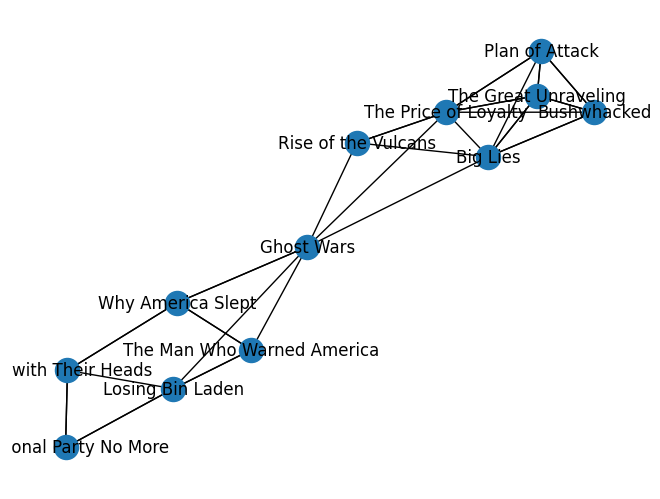

In [ ]:

nx.draw(Gf, with_labels=True)

In [ ]:
list(Gf.nodes())

['A National Party No More',
 'Losing Bin Laden',
 'Off with Their Heads',
 'Bushwhacked',
 'The Price of Loyalty',
 'The Great Unraveling',
 'Big Lies',
 'Plan of Attack',
 'Why America Slept',
 'Ghost Wars',
 'Rise of the Vulcans',
 'The Man Who Warned America']

In [ ]:
G.nodes(data=True)['1000 Years for Revenge']['value']

'n'

In [ ]:
for node in Gf.nodes():
  print((G.nodes(data=True)[node]['value']))

c
c
c
l
l
l
l
n
n
n
c
c


In [ ]:
list(G.edges('Ghost Wars',data=True))

[('Ghost Wars', "Charlie Wilson's War", {'edge_type': 'e3', 'color': 'black'}),
 ('Ghost Wars',
  'The Man Who Warned America',
  {'edge_type': 'e3', 'color': 'black'}),
 ('Ghost Wars', 'Why America Slept', {'edge_type': 'e1', 'color': 'grey'}),
 ('Ghost Wars', "Rumsfeld's War", {'edge_type': 'e3', 'color': 'black'}),
 ('Ghost Wars',
  'The Price of Loyalty',
  {'edge_type': 'e5', 'color': 'orange'}),
 ('Ghost Wars', 'Rise of the Vulcans', {'edge_type': 'e3', 'color': 'black'}),
 ('Ghost Wars', 'Against All Enemies', {'edge_type': 'e5', 'color': 'orange'}),
 ('Ghost Wars', 'Disarming Iraq', {'edge_type': 'e5', 'color': 'orange'})]

<BarContainer object of 10 artists>

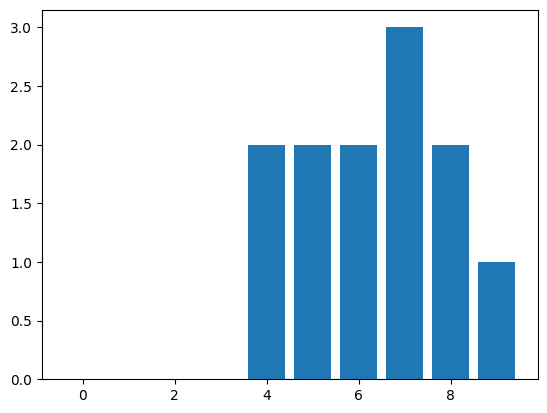

In [ ]:
plt.bar(range(len(nx.degree_histogram(Gf))),height=nx.degree_histogram(Gf))

In [ ]:
print('average_shortest_path_length', nx.average_shortest_path_length(Gf))
print('diameter', nx.diameter(Gf))
#print('average_clustering', nx.average_clustering(Gf))
print('degree_pearson_correlation_coefficient', nx.degree_pearson_correlation_coefficient(Gf))


average_shortest_path_length 2.0454545454545454
diameter 4
degree_pearson_correlation_coefficient 0.2572137759851071


In [ ]:
print('Degree Centrality', nx.degree_centrality(Gf))
print('pagerank', nx.pagerank(Gf))
print('Closeness Centrality', nx.closeness_centrality(Gf))
print('Betweenness Centrality', nx.betweenness_centrality(Gf))


Degree Centrality {'A National Party No More': 0.36363636363636365, 'Losing Bin Laden': 0.5454545454545454, 'Off with Their Heads': 0.4545454545454546, 'Bushwhacked': 0.6363636363636364, 'The Price of Loyalty': 0.8181818181818182, 'The Great Unraveling': 0.7272727272727273, 'Big Lies': 0.7272727272727273, 'Plan of Attack': 0.6363636363636364, 'Why America Slept': 0.5454545454545454, 'Ghost Wars': 0.6363636363636364, 'Rise of the Vulcans': 0.36363636363636365, 'The Man Who Warned America': 0.4545454545454546}
pagerank {'A National Party No More': 0.06386522511294421, 'Losing Bin Laden': 0.08915580320220287, 'Off with Their Heads': 0.07677550067651898, 'Bushwhacked': 0.08287856894821233, 'The Price of Loyalty': 0.10715783125445659, 'The Great Unraveling': 0.09330026972094764, 'Big Lies': 0.09558548683300763, 'Plan of Attack': 0.08285001055355004, 'Why America Slept': 0.08647584364164636, 'Ghost Wars': 0.09397365231237645, 'Rise of the Vulcans': 0.05430771208415078, 'The Man Who Warned Am

In [ ]:
pb_dc=nx.degree_centrality(Gf)
pb_pg=nx.pagerank(Gf)
pb_cc=nx.closeness_centrality(Gf)
pb_bc=nx.betweenness_centrality(Gf)
#pb_ec=nx.eigenvector_centrality(Gf,max_iter=600)

In [ ]:
(max(pb_dc, key=pb_dc.get),max(pb_pg, key=pb_pg.get),max(pb_cc, key=pb_cc.get),max(pb_bc, key=pb_bc.get))


('The Price of Loyalty', 'The Price of Loyalty', 'Ghost Wars', 'Ghost Wars')

In [ ]:
sorted(pb_dc.items(), key=lambda item: item[1],reverse=True)

[('The Price of Loyalty', 0.8181818181818182),
 ('The Great Unraveling', 0.7272727272727273),
 ('Big Lies', 0.7272727272727273),
 ('Bushwhacked', 0.6363636363636364),
 ('Plan of Attack', 0.6363636363636364),
 ('Ghost Wars', 0.6363636363636364),
 ('Losing Bin Laden', 0.5454545454545454),
 ('Why America Slept', 0.5454545454545454),
 ('Off with Their Heads', 0.4545454545454546),
 ('The Man Who Warned America', 0.4545454545454546),
 ('A National Party No More', 0.36363636363636365),
 ('Rise of the Vulcans', 0.36363636363636365)]

In [ ]:

sorted(pb_pg.items(), key=lambda item: item[1],reverse=True)

[('The Price of Loyalty', 0.10715783125445659),
 ('Big Lies', 0.09558548683300763),
 ('Ghost Wars', 0.09397365231237645),
 ('The Great Unraveling', 0.09330026972094764),
 ('Losing Bin Laden', 0.08915580320220287),
 ('Why America Slept', 0.08647584364164636),
 ('Bushwhacked', 0.08287856894821233),
 ('Plan of Attack', 0.08285001055355004),
 ('Off with Their Heads', 0.07677550067651898),
 ('The Man Who Warned America', 0.07367409565998573),
 ('A National Party No More', 0.06386522511294421),
 ('Rise of the Vulcans', 0.05430771208415078)]

In [ ]:

sorted(pb_cc.items(), key=lambda item: item[1],reverse=True)

[('Ghost Wars', 0.6875),
 ('The Price of Loyalty', 0.6111111111111112),
 ('Big Lies', 0.6111111111111112),
 ('Losing Bin Laden', 0.5238095238095238),
 ('Rise of the Vulcans', 0.5238095238095238),
 ('Why America Slept', 0.5),
 ('The Man Who Warned America', 0.5),
 ('Bushwhacked', 0.44),
 ('The Great Unraveling', 0.44),
 ('Plan of Attack', 0.44),
 ('Off with Their Heads', 0.39285714285714285),
 ('A National Party No More', 0.3793103448275862)]

In [ ]:


sorted(pb_bc.items(), key=lambda item: item[1],reverse=True)

[('Ghost Wars', 0.5515151515151515),
 ('Losing Bin Laden', 0.21818181818181817),
 ('The Price of Loyalty', 0.1909090909090909),
 ('Big Lies', 0.1909090909090909),
 ('Why America Slept', 0.07272727272727272),
 ('Off with Their Heads', 0.02424242424242424),
 ('The Man Who Warned America', 0.00606060606060606),
 ('A National Party No More', 0.0),
 ('Bushwhacked', 0.0),
 ('The Great Unraveling', 0.0),
 ('Plan of Attack', 0.0),
 ('Rise of the Vulcans', 0.0)]

In [ ]:
list(Gf.nodes())

['A National Party No More',
 'Losing Bin Laden',
 'Off with Their Heads',
 'Bushwhacked',
 'The Price of Loyalty',
 'The Great Unraveling',
 'Big Lies',
 'Plan of Attack',
 'Why America Slept',
 'Ghost Wars',
 'Rise of the Vulcans',
 'The Man Who Warned America']

In [ ]:
node_color1

[0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0]

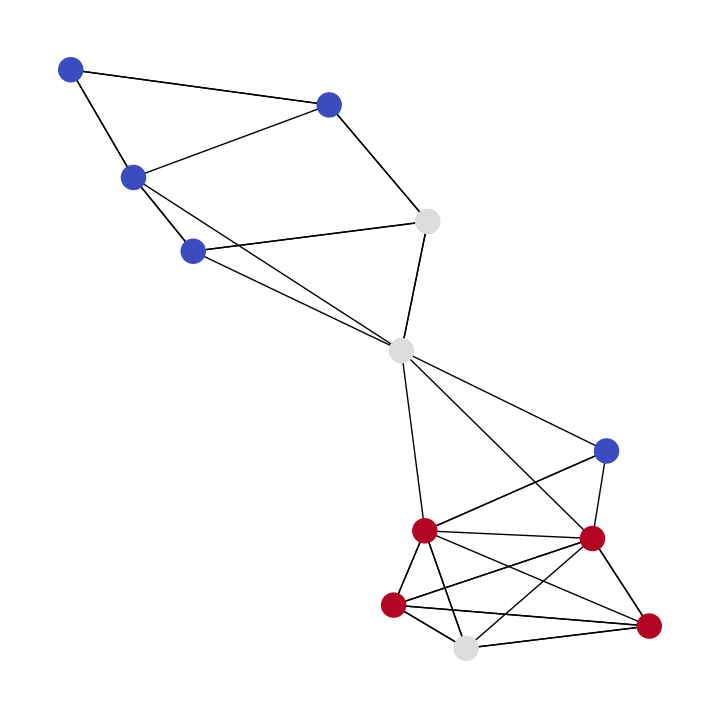

In [ ]:
node_color1 = [color_map[community_map[node]] for node in Gf.nodes()]
pos2 = nx.spring_layout(Gf)
plt.figure(figsize=(7, 7))
nx.draw(Gf, cmap=plt.get_cmap('coolwarm'), node_color=node_color1)
plt.show()

In [ ]:
list(Gf.nodes())

['A National Party No More',
 'Losing Bin Laden',
 'Off with Their Heads',
 'Bushwhacked',
 'The Price of Loyalty',
 'The Great Unraveling',
 'Big Lies',
 'Plan of Attack',
 'Why America Slept',
 'Ghost Wars',
 'Rise of the Vulcans',
 'The Man Who Warned America']

##1-5

In [ ]:
G_orig.nodes(data=True)

In [ ]:
colors = ['red', 'blue', 'green','black','pink','orange','gray']

In [ ]:
dic=dict(G1.nodes())
color_map_l = ['black'] * nx.number_of_nodes(G)
for c in range(len(list((G.nodes())))):
  if dic[c]['value'] == 'n' :color_map_l[c] = colors[0]
  elif dic[c]['value'] == 'c' :color_map_l[c] = colors[1]
  elif dic[c]['value'] == 'l' :color_map_l[c] = colors[2]


In [ ]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_l)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

In [ ]:
from networkx.algorithms.community import naive_greedy_modularity_communities

lst_m = naive_greedy_modularity_communities(G1)
color_map_m = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_m :
  for n in c :
    color_map_m[n] = colors[counter] #カラーは0->1、1->2...で格納のためn-1
  counter = counter + 1

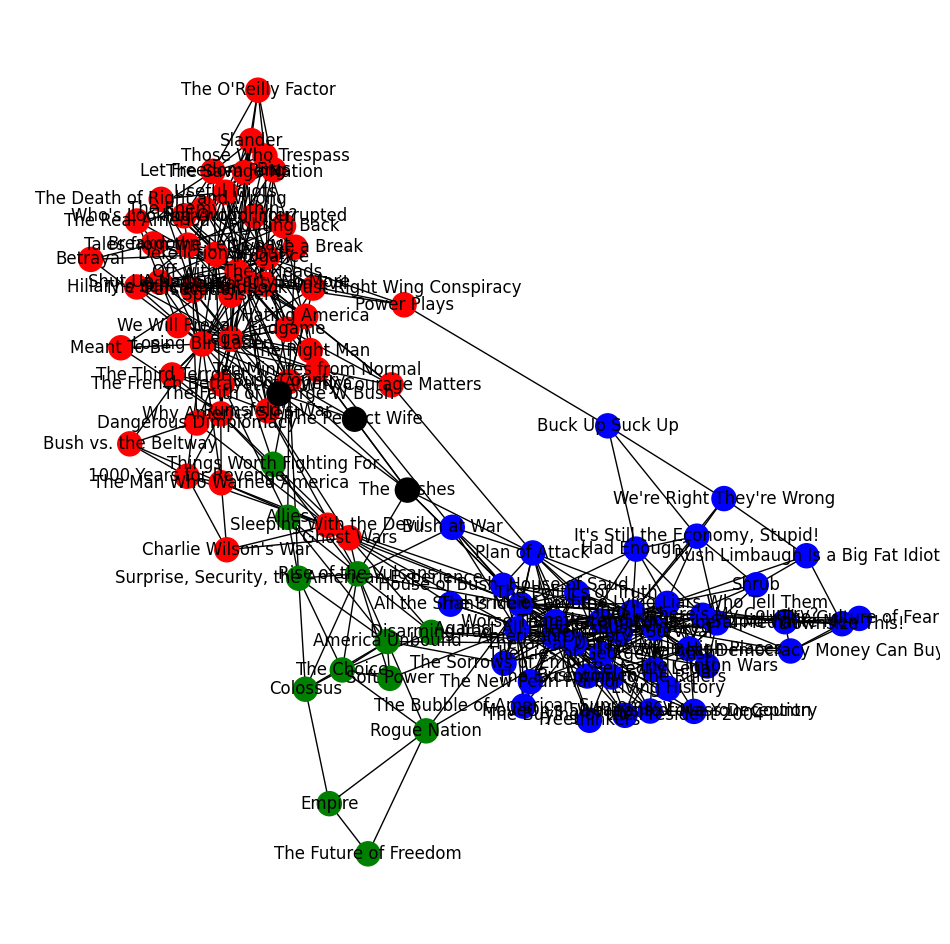

In [ ]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_m)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

#node2vec &gnn

##node2vec

In [ ]:
import os
import torch

torch.manual_seed(53)
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html

import torch_cluster
import torch_geometric

2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.9 MB/s eta 0:00:00


In [ ]:
from torch_geometric.utils.convert import from_networkx

In [ ]:
data = from_networkx(G)

In [ ]:
data.edge_index.shape

torch.Size([2, 882])

In [ ]:
import torch
from torch_geometric.nn import Node2Vec

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = Node2Vec(
    data.edge_index,
    embedding_dim=128,
    walks_per_node=10,
    walk_length=20,
    context_size=10,
    p=0.5,
    q=0.5,
    num_negative_samples=1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
pos_rw, neg_rw = next(iter(loader))

In [ ]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [ ]:
for epoch in range(1, 101):
    loss = train()

    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 10.1473
Epoch: 002, Loss: 9.7759
Epoch: 003, Loss: 9.4073
Epoch: 004, Loss: 9.2051
Epoch: 005, Loss: 8.8379
Epoch: 006, Loss: 8.7136
Epoch: 007, Loss: 8.3523
Epoch: 008, Loss: 8.1508
Epoch: 009, Loss: 8.0083
Epoch: 010, Loss: 7.7265
Epoch: 011, Loss: 7.4429
Epoch: 012, Loss: 7.3475
Epoch: 013, Loss: 7.0458
Epoch: 014, Loss: 6.9015
Epoch: 015, Loss: 6.8038
Epoch: 016, Loss: 6.5532
Epoch: 017, Loss: 6.3724
Epoch: 018, Loss: 6.2363
Epoch: 019, Loss: 6.1264
Epoch: 020, Loss: 5.9131
Epoch: 021, Loss: 5.7962
Epoch: 022, Loss: 5.6795
Epoch: 023, Loss: 5.5921
Epoch: 024, Loss: 5.3783
Epoch: 025, Loss: 5.3297
Epoch: 026, Loss: 5.1569
Epoch: 027, Loss: 5.0924
Epoch: 028, Loss: 4.9751
Epoch: 029, Loss: 4.9185
Epoch: 030, Loss: 4.7985
Epoch: 031, Loss: 4.7010
Epoch: 032, Loss: 4.5888
Epoch: 033, Loss: 4.5750
Epoch: 034, Loss: 4.4784
Epoch: 035, Loss: 4.4163
Epoch: 036, Loss: 4.3280
Epoch: 037, Loss: 4.2645
Epoch: 038, Loss: 4.2425
Epoch: 039, Loss: 4.1653
Epoch: 040, Loss: 4.1292

In [ ]:
z = model()

In [ ]:
z1=z.detach().numpy()

In [ ]:
x2 = np.zeros((105,105))

In [ ]:
z1[0,:].shape

(128,)

In [ ]:
z1[1].shape

(128,)

In [ ]:
x2[1][2]

0.0

In [ ]:
for i in range(105):
  for l in range(105):
     cos=z1[i]@z1[l]/(np.linalg.norm(z1[i]) *np.linalg.norm(z1[l]))
     x2[i][l]=cos


In [ ]:
x2.shape

(105, 105)

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(x2, index=list(G.nodes()), columns=list(G.nodes()))

In [ ]:
df

,1000 Years for Revenge,Bush vs. the Beltway,Charlie Wilson's War,Losing Bin Laden,Sleeping With the Devil,The Man Who Warned America,Why America Slept,Ghost Wars,A National Party No More,Bush Country,...,We're Right They're Wrong,What Liberal Media?,The Clinton Wars,Weapons of Mass Deception,"Dude, Where's My Country?",Thieves in High Places,Shrub,Buck Up Suck Up,The Future of Freedom,Empire
1000 Years for Revenge,1.000000,0.010532,0.015690,0.015525,0.018174,0.015639,0.017000,0.010170,0.008194,0.003850,...,-0.011822,-0.072872,-0.012372,-0.014961,-0.021833,-0.014684,-0.013213,-0.013395,-0.015384,-0.010837
Bush vs. the Beltway,0.010532,1.000000,0.005461,0.013650,0.009024,0.014732,0.010999,0.003912,0.003494,0.000115,...,0.267001,-0.017631,-0.031038,-0.128451,-0.027766,-0.010640,-0.013754,-0.029705,-0.027183,0.252744
Charlie Wilson's War,0.015690,0.005461,1.000000,0.010112,0.013316,0.273398,0.010461,0.009575,-0.000186,0.000484,...,-0.023493,-0.017706,-0.077391,-0.177625,-0.107312,-0.027955,-0.013187,-0.027664,-0.011712,-0.005546
Losing Bin Laden,0.015525,0.013650,0.010112,1.000000,0.012383,0.014464,0.019365,0.011422,0.023430,0.017170,...,-0.068429,-0.037022,-0.022744,-0.015312,0.055009,-0.022337,-0.016526,-0.005117,-0.067982,-0.012026
Sleeping With the Devil,0.018174,0.009024,0.013316,0.012383,1.000000,0.019047,0.019106,0.010087,0.001794,0.001112,...,-0.093697,-0.023998,-0.009112,-0.008550,-0.007248,-0.001846,-0.019629,-0.027886,-0.036209,-0.021992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thieves in High Places,-0.014684,-0.010640,-0.027955,-0.022337,-0.001846,-0.181055,-0.069636,-0.000628,-0.051631,-0.013100,...,0.004592,0.013273,0.007344,0.013438,0.018222,1.000000,0.008800,0.018469,-0.046627,-0.033663
Shrub,-0.013213,-0.013754,-0.013187,-0.016526,-0.019629,-0.024257,-0.021726,-0.011678,-0.040492,-0.090983,...,0.012139,-0.001038,-0.000240,-0.002317,0.007474,0.008800,1.000000,0.004210,-0.017695,-0.026160
Buck Up Suck Up,-0.013395,-0.029705,-0.027664,-0.005117,-0.027886,-0.010156,-0.011909,-0.013322,0.006173,-0.010019,...,0.015618,0.003157,0.001187,-0.007998,0.000883,0.018469,0.004210,1.000000,-0.025042,-0.076306
The Future of Freedom,-0.015384,-0.027183,-0.011712,-0.067982,-0.036209,0.217199,-0.016171,-0.008061,-0.032230,-0.013263,...,-0.016441,-0.032827,-0.021463,-0.023406,-0.005407,-0.046627,-0.017695,-0.025042,1.000000,0.018135


-0.005546126049011946

In [ ]:
for node in Gf.nodes():
  for l in Gf.nodes():
     if node == l :pass
     else : print(node,'|',l,':',df[node][l])

A National Party No More | Losing Bin Laden : 0.02343020960688591
A National Party No More | Off with Their Heads : 0.17924758791923523
A National Party No More | Bushwhacked : 0.07444898039102554
A National Party No More | The Price of Loyalty : -0.003959213383495808
A National Party No More | The Great Unraveling : -0.004799221642315388
A National Party No More | Big Lies : -0.0036804431583732367
A National Party No More | Plan of Attack : 0.0033401523251086473
A National Party No More | Why America Slept : 0.019027583301067352
A National Party No More | Ghost Wars : 0.0031746646855026484
A National Party No More | Rise of the Vulcans : 0.010799413546919823
A National Party No More | The Man Who Warned America : 0.008631947450339794
Losing Bin Laden | A National Party No More : 0.02343020960688591
Losing Bin Laden | Off with Their Heads : 0.022332336753606796
Losing Bin Laden | Bushwhacked : -0.0012967824004590511
Losing Bin Laden | The Price of Loyalty : 0.0063634831458330154
Losing

##gnn

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch_geometric.transforms as T

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        super(GCN, self).__init__()
        self.convs = None
        self.bns = None
        self.softmax = None
        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()
        for l in range(num_layers):
          if l==0: #change input output dims accordingly
            self.convs.append(GCNConv(input_dim, hidden_dim))
          elif l == num_layers-1:
            self.convs.append(GCNConv(hidden_dim, output_dim))
          else:
            self.convs.append(GCNConv(hidden_dim, hidden_dim))
          if l < num_layers-1:
            self.bns.append(torch.nn.BatchNorm1d(hidden_dim))

        self.last_conv = GCNConv(hidden_dim, output_dim)
        self.log_soft = torch.nn.LogSoftmax()
        self.dropout = dropout
        self.return_embeds = return_embeds
    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        out = None
        for l in range(len(self.convs)-1):
          x = self.convs[l](x, adj_t)
          x = self.bns[l](x)
          x = F.relu(x)
          x = F.dropout(x, training=self.training)
        x = self.last_conv(x, adj_t)
        if self.return_embeds is True:
          out = x
        else:
          out = self.log_soft(x)
        return out

In [ ]:
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=1dbef7fc9bf0ec1e7ee4004db2d48409362ffc1baa1356afddc0a32527b37c94
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

In [ ]:
args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs': 100,
  }


In [ ]:
model = GCN(105, args['hidden_dim'],
              3, args['num_layers'],
             args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [ ]:
data11 = from_networkx(G1)

In [ ]:
print('Degree Centrality', nx.degree_centrality(G))
print('pagerank', nx.pagerank(G))
print('Closeness Centrality', nx.closeness_centrality(G))
print('Betweenness Centrality', nx.betweenness_centrality(G))
print('Eigenvector Centrality', nx.eigenvector_centrality(G,max_iter=600))

In [ ]:
fes=np.zeros((105,3))

In [ ]:
for node in list(G1.nodes(data=True)):
   if (node[1]['value'] =='c'):fes[node[0]][0] = 1
   elif (node[1]['value'] =='n'):fes[node[0]][1] = 1
   elif (node[1]['value'] =='l'):fes[node[0]][2] = 1


In [ ]:
adj_t=nx.adjacency_matrix(G1).todense()

In [ ]:
def get_symmetric(a, use_tril=True):
    if use_tril:
        a = np.tril(a)
    else:
        a = np.triu(a)
    return a + a.T - np.diag(a.diagonal())

In [ ]:
adj_t=get_symmetric(adj_t)

In [ ]:
x=np.eye(105)

In [ ]:
y=np.zeros(105)

In [ ]:
nx.set_node_attributes(G1,dict(zip(list(G1.nodes()), x.tolist())),'x')
nx.set_node_attributes(G1,dict(zip(list(G1.nodes()), adj_t.tolist())),'adj_t')
nx.set_node_attributes(G1,dict(zip(list(G1.nodes()), list(community_map.values()))),'y')

In [ ]:
data11 = from_networkx(G1)

In [ ]:
data11.y

tensor([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 1])

In [ ]:
from torch_geometric.data import Data, InMemoryDataset

In [ ]:
data11

Data(x=[105, 105], edge_index=[2, 882], y=[105], label=[105], value=[105], adj_t=[105, 105])

In [ ]:
data = Data(x=data11.x, edge_index=data11.edge_index, y=data11.y, edge_attr=data11.adj_t)

In [ ]:
from torch_geometric.transforms import RandomLinkSplit

transform = RandomLinkSplit(is_undirected=True)
train_data, val_data, test_data = transform(data)

In [ ]:
import torch_sparse

In [ ]:
def train(model, data, optimizer, loss_fn):
    model.train()
    loss = 0
    optimizer.zero_grad()
    output=model(data.x,data.edge_index)
    output=output
    train_label = data.y
    loss=loss_fn(output,train_label)

    loss.backward()
    optimizer.step()

    return loss.item()

In [ ]:
model(train_data.x,train_data.edge_index).argmax(dim=-1, keepdim=True).flatten()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2,
        2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 1])

In [ ]:
# Test function here
@torch.no_grad()
def test(model, train_data, vaild_data,test_data, evaluator, save_model_results=False):
    model.eval()

    train_acc = evaluator.eval({
        'y_true': train_data.y.reshape(105,1),
        'y_pred': model(train_data.x,train_data.edge_index).argmax(dim=-1, keepdim=True),
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': vaild_data.y.reshape(105,1),
        'y_pred':model(vaild_data.x,vaild_data.edge_index).argmax(dim=-1, keepdim=True),
    })['acc']
    test_acc = evaluator.eval({
        'y_true': test_data.y.reshape(105,1),
        'y_pred': model(test_data.x,test_data.edge_index).argmax(dim=-1, keepdim=True),
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [ ]:
model.reset_parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss
best_valid_acc = 0
for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, train_data, optimizer, loss_fn)
    result = test(model, train_data, val_data, test_data, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 0.8286, Train: 86.67%, Valid: 86.67% Test: 85.71%
Epoch: 02, Loss: 0.3081, Train: 85.71%, Valid: 85.71% Test: 87.62%
Epoch: 03, Loss: 0.2757, Train: 78.10%, Valid: 78.10% Test: 76.19%
Epoch: 04, Loss: 0.2526, Train: 57.14%, Valid: 57.14% Test: 54.29%
Epoch: 05, Loss: 0.2099, Train: 50.48%, Valid: 50.48% Test: 49.52%
Epoch: 06, Loss: 0.1910, Train: 46.67%, Valid: 46.67% Test: 46.67%
Epoch: 07, Loss: 0.1804, Train: 49.52%, Valid: 49.52% Test: 47.62%
Epoch: 08, Loss: 0.1509, Train: 51.43%, Valid: 51.43% Test: 49.52%
Epoch: 09, Loss: 0.1473, Train: 52.38%, Valid: 52.38% Test: 52.38%
Epoch: 10, Loss: 0.1827, Train: 62.86%, Valid: 62.86% Test: 60.00%
Epoch: 11, Loss: 0.1379, Train: 70.48%, Valid: 70.48% Test: 71.43%
Epoch: 12, Loss: 0.1314, Train: 78.10%, Valid: 78.10% Test: 75.24%
Epoch: 13, Loss: 0.1301, Train: 78.10%, Valid: 78.10% Test: 78.10%
Epoch: 14, Loss: 0.1015, Train: 80.00%, Valid: 80.00% Test: 79.05%
Epoch: 15, Loss: 0.1103, Train: 79.05%, Valid: 79.05% Test: 80

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool
class GCN_Graph(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()
        self.gnn_node = GCN(input_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)
        self.gnn_node_2 = GCN(hidden_dim, hidden_dim,
        hidden_dim, num_layers, dropout, return_embeds=True)
        self.asap = torch_geometric.nn.pool.ASAPooling(in_channels = 256, ratio = 0.5, dropout = 0.1, negative_slope = 0.2, add_self_loops = False)
        self.pool = global_mean_pool
        self.linear = torch.nn.Linear(hidden_dim, output_dim)
    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()
    def forward(self, batched_data):
        x, edge_index, batch, edge_weight = batched_data.x, batched_data.edge_index, batched_data.batch, batched_data.edge_attr
        embed = x
        out = None
        num_graphs = int(len(batch)/51)
        post_GCN_1 = self.gnn_node(embed, edge_index, edge_weight)
        post_pool_1 = self.asap(post_GCN_1, edge_index)
        post_GCN_2 = self.gnn_node_2(post_pool_1[0], post_pool_1[1], post_pool_1[2])
        post_pool_2 = self.asap(post_GCN_2, post_pool_1[1])
        ultimate_gcn = self.gnn_node_2(post_pool_2[0], post_pool_2[1], post_pool_2[2])
        glob_pool = self.pool(ultimate_gcn, post_pool_2[3], num_graphs)
        out = self.linear(glob_pool)
        return out

In [ ]:
def train(model, device, data_loader, optimizer, loss_fn):
    # This function that trains your model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out[is_labeled].squeeze(), batch.y[is_labeled].to(torch.float32).squeeze())

        loss.backward()
        optimizer.step()

    return loss.item()

In [ ]:
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm

In [ ]:
from torch_geometric.loader import NeighborLoader

In [ ]:
re=model(data33.x,data.edge_index)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
re1=torch_geometric.nn.pool.ASAPooling(in_channels = 3, ratio = 0.5, dropout = 0.1, negative_slope = 0.2, add_self_loops = False)(re, data33.edge_index)

In [ ]:
re1[0].shape,re1[1].shape,

(torch.Size([53, 3]), torch.Size([2, 2286]))

In [ ]:
re1[1].shape

torch.Size([2, 2326])

In [ ]:
from torch_geometric.nn import global_add_pool, global_mean_pool

In [ ]:
type(data11.edge_index.to(torch.long))

torch.Tensor

In [ ]:
data11.y.reshape(105,1).shape

torch.Size([105, 1])

In [ ]:
data = Data(x=data11.x.to(torch.long), edge_index=data11.edge_index, y=data11.y.reshape(105,1), edge_attr=data11.adj_t)

In [ ]:
from torch_geometric.loader import ClusterData, ClusterLoader, NeighborLoader
from torch_geometric.nn import SAGEConv

cluster_data = ClusterData(data111, num_parts=1500, recursive=False,
                         )
train_loader1 = ClusterLoader(cluster_data, batch_size=20, shuffle=True,
                             num_workers=12)

In [ ]:

from torch_geometric.data import HeteroData

data111= HeteroData(data)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1]])

Data(x=[105, 105], edge_index=[2, 882], edge_attr=[105, 105], y=[105, 1])

In [ ]:
cluster_data

ClusterData(1500)

In [ ]:
train_loader = DataLoader(data, batch_size=5, shuffle=False,num_workers=1)

In [ ]:
data

Data(x=[105, 105], edge_index=[2, 882], edge_attr=[105, 105], y=[105, 1])

In [ ]:
data

Data(x=[105, 105], edge_index=[2, 882], edge_attr=[105, 105], y=[105])

In [ ]:
train_data

Data(x=[105, 105], edge_index=[2, 618], edge_attr=[105, 105], y=[105, 1], edge_label=[618], edge_label_index=[2, 618])

In [ ]:
from torch_geometric.loader import NeighborLoader

train_loader = NeighborLoader(train_data,
                                 num_neighbors=[3],
                                 batch_size=3,
                                 shuffle=True)

val_loader = NeighborLoader(val_data,
                                 num_neighbors=[3],
                                 batch_size=3,
                                 shuffle=True)

test_loader = NeighborLoader(test_data,
                                 num_neighbors=[3],
                                 batch_size=3,
                                 shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:60: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [ ]:
for step, batch in enumerate(tqdm(train_loader, desc="Iteration")):
      print(batch.x.shape)

Iteration:   0%|          | 0/35 [00:00<?, ?it/s]

torch.Size([11, 105])
torch.Size([12, 105])
torch.Size([11, 105])
torch.Size([12, 105])
torch.Size([9, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([10, 105])
torch.Size([9, 105])
torch.Size([10, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([11, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([11, 105])
torch.Size([12, 105])
torch.Size([10, 105])
torch.Size([12, 105])
torch.Size([11, 105])
torch.Size([9, 105])
torch.Size([10, 105])
torch.Size([11, 105])
torch.Size([11, 105])
torch.Size([11, 105])
torch.Size([10, 105])
torch.Size([12, 105])
torch.Size([12, 105])
torch.Size([10, 105])
torch.Size([12, 105])
torch.Size([9, 105])
torch.Size([11, 105])
torch.Size([11, 105])


In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

In [ ]:
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()
        self.node_encoder = AtomEncoder(hidden_dim)
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)
        self.pool = None
        self.pool = global_mean_pool
        self.linear = torch.nn.Linear(hidden_dim, output_dim)
    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch = batched_data.x, batched_data.edge_index, 3
        embed = self.node_encoder(x)
        out = None
        out = self.gnn_node(embed,edge_index)
        out = self.pool(out,batch)
        out = self.linear(out)
        return out

In [ ]:
class GCN_Graph(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()
        self.gnn_node = GCN(input_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)
        self.gnn_node_2 = GCN(hidden_dim, hidden_dim,
        hidden_dim, num_layers, dropout, return_embeds=True)
        self.asap = torch_geometric.nn.pool.ASAPooling(in_channels = 256, ratio = 0.5, dropout = 0.1, negative_slope = 0.2, add_self_loops = False)
        self.pool = global_mean_pool
        self.linear = torch.nn.Linear(hidden_dim, output_dim)

    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        x, edge_index, batch, = batched_data.x, batched_data.edge_index,2
        embed = x
        out = None
        #num_graphs = int(len(batch)/51)
        post_GCN_1 = self.gnn_node(embed.float(), edge_index,)
        post_pool_1 = self.asap(post_GCN_1, edge_index)
        post_GCN_2 = self.gnn_node_2(post_pool_1[0], post_pool_1[1],)
        post_pool_2 = self.asap(post_GCN_2, post_pool_1[1])
        ultimate_gcn = self.gnn_node_2(post_pool_2[0], post_pool_2[1],)

        glob_pool = self.pool(ultimate_gcn, post_pool_2[3], 3)
        out = self.linear(glob_pool)

        return out

In [ ]:
model1 = GCN_Graph(105,args['hidden_dim'],
              1, args['num_layers'],
              args['dropout']).to(device)


In [ ]:
gnn_node = GCN(105,args['hidden_dim'],
            args['hidden_dim'], args['num_layers'], args['dropout'], return_embeds=True)

In [ ]:
gnn_node1=GCN(256,args['hidden_dim'],
            args['hidden_dim'], args['num_layers'], args['dropout'], return_embeds=True)

In [ ]:
data.x.shape

torch.Size([105, 105])

In [ ]:
asp=torch_geometric.nn.pool.ASAPooling(in_channels = 256, ratio = 0.5, dropout = 0.1, negative_slope = 0.2, add_self_loops = False)

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()


In [ ]:
   if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
   else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

In [ ]:
for step, batch in enumerate(tqdm(train_loader, desc="Iteration")):
   print(batch)

   #out=model1(batch)
   #print(batch.edge_label)
   #print(out.shape)
   #loss=loss_fn(out.squeeze(),batch.edge_label.squeeze())
   #print(loss)
   #print(out)

Iteration:   0%|          | 0/35 [00:00<?, ?it/s]

Data(x=[10, 105], edge_index=[2, 7], edge_attr=[10, 105], y=[10, 1], edge_label=[7], edge_label_index=[2, 7], n_id=[10], e_id=[7], input_id=[3], batch_size=3)
Data(x=[10, 105], edge_index=[2, 9], edge_attr=[10, 105], y=[10, 1], edge_label=[9], edge_label_index=[2, 9], n_id=[10], e_id=[9], input_id=[3], batch_size=3)
Data(x=[8, 105], edge_index=[2, 7], edge_attr=[8, 105], y=[8, 1], edge_label=[7], edge_label_index=[2, 7], n_id=[8], e_id=[7], input_id=[3], batch_size=3)
Data(x=[12, 105], edge_index=[2, 9], edge_attr=[12, 105], y=[12, 1], edge_label=[9], edge_label_index=[2, 9], n_id=[12], e_id=[9], input_id=[3], batch_size=3)
Data(x=[12, 105], edge_index=[2, 9], edge_attr=[12, 105], y=[12, 1], edge_label=[9], edge_label_index=[2, 9], n_id=[12], e_id=[9], input_id=[3], batch_size=3)
Data(x=[7, 105], edge_index=[2, 6], edge_attr=[7, 105], y=[7, 1], edge_label=[6], edge_label_index=[2, 6], n_id=[7], e_id=[6], input_id=[3], batch_size=3)
Data(x=[12, 105], edge_index=[2, 9], edge_attr=[12, 10

In [ ]:
for step, batch in enumerate(tqdm(train_loader, desc="Iteration")):
      pg1=gnn_node(batch.x.float(),batch.edge_index)
      #print(pg1.shape)
      pp1=asp(pg1,batch.edge_index)
      #print(pp1[0].shape,pp1[1].shape)
      pg2=gnn_node1(pp1[0],pp1[1])
      #print(pg2.shape)
      pp2=asp(pg2,pp1[1])
      #print(pp2[0].shape,pp2[1].shape)
      pg3=gnn_node1(pp2[0],pp2[1])
      print(pg3.shape,pp2[3].shape)
      pp3= global_mean_pool(pg3,pp2[3],4)
      print(pp3.shape)
      out=torch.nn.Linear(256, 3)(pp3)
      #print(batch)

Iteration:   0%|          | 0/35 [00:00<?, ?it/s]

torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3, 256]) torch.Size([3])
torch.Size([4, 256])
torch.Size([3,